# **📋 RFM Customer Segmentation and Association Analysis for Marketing Strategy**  
---


> **Context**

* Project Summary
* Problem Introduction
* 🔈Process01
* 🔉Process02
* 🔊Process03

<br>



[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/videpurple/DA_portfolio/blob/main/Customer%20Segmentation/Notebook/customer_segmentation_rfm_analysis.ipynb)

## **Project Summary**
---

> **Project Title**

```
▶ RFM Customer Segmentation and Marketing Strategy Proposal
```  

> **Project Type**

```
▶ Data EDA and Customer Segmentation
```

> **Learning Objectives**

```
▶ Develop the ability to understand and preprocess customer transaction data  
▶ Learn and apply RFM (Recency, Frequency, Monetary) analysis for customer segmentation  
▶ Strengthen the ability to derive actionable business insights and build marketing strategies based on RFM results
```

## **Problem Introduction**
---

> **Scenario**  

```
At the beginning of 2020, the company raised its target operating profit.  
To meet this goal, we are realigning our marketing strategy.  
Among various strategic approaches, we chose to segment customers based on purchase data to establish a more effective marketing plan.
```
> **Problem Definition**

```
▶ A revised marketing strategy is required due to the increased operating profit target
```  

> **Expected Outcome**

```
▶ Increase in operating profit through redesigned marketing efforts
```

> **Proposed Solution**

```
▶ Implement personalized marketing through customer segmentation
```

> **Performance Measurement**  

```
▶ Compare operating profit before and after the marketing strategy adjustment  
▶ Assess customer satisfaction with the new marketing approach
```

> **Operations**  

```
▶ Manage and utilize purchase data by segmented customer groups  
▶ Use BI dashboards to track customer behavior and key marketing indicators
```

> **Exploring the Data**
---
* Data Source : [Monthly Dacon – E-commerce Customer Segmentation Competition](https://dacon.io/competitions/official/236222/data)   
<br>  
* Onlinesales_info : Info about online transactions

|ColumnName|Description|
|:---:|:---:|
|CustomerID|Unique customer ID|
|TransactionID|Unique transaction ID|
|TransactionDate|Date of transaction|
|ProductID|Unique product ID|
|ProductCategory|Product category|
|Quantity|Quantity ordered|
|UnitPrice|	Price per unit (USD), varies by product options|
|DeliveryFee|Delivery cost (USD)|
|CouponApplied|Whether a coupon was applied|

<br>  
* Customer_info : Info about the customers

|ColumnName|Description|
|:---:|:---:|
|CustomerID|Unique customer ID|
|Gender|Gender|
|Region|Region|
|MonthsAsCustomer|Months since joining the service|

<br>  
* Discount_info : Info about discount coupons

|ColumnName|Description|
|:---:|:---:|
|Month|Month|
|ProductCategory|Product category|
|CouponCode|Coupon code|
|DiscountRate|	Discount rate (%)|


<br>  
* Tax_info : Info about product taxes

|ColumnName|Description|
|:---:|:---:|
|ProductCategory|Product category|
|GST|Goods and Services Tax (%) – like VAT|


### 🔧 Environment Setup (Click to Expand)
*This cell contains installation commands and setup code. You can collapse it if not needed.*

In [ ]:
# Install Korean font for visualization

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
# Install specific library versions to ensure consistency of analysis
# !pip install scikit-learn==1.2.2
# !pip install numpy==1.24.4
# !pip install pandas==1.5.3

In [ ]:
# Check installed library versions
import sklearn, numpy, pandas
print("scikit-learn:", sklearn.__version__)
print("numpy:", numpy.__version__)
print("pandas:", pandas.__version__)

scikit-learn: 1.2.2
numpy: 1.24.4
pandas: 1.5.3


In [ ]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set the file path to load the dataset
import os
os.chdir('/content/drive/MyDrive/Zerobase Course/team_pj/data')
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/Zerobase Course/team_pj/data'

In [ ]:
# Load the dataset
import pandas as pd
df_o = pd.read_csv('Onlinesales_info.csv')
df_c = pd.read_csv('Customer_info.csv')
df_d = pd.read_csv('Discount_info.csv')
df_t = pd.read_csv('Tax_info.csv')

df_o.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used


In [ ]:
# Rename columns from Korean to English

df_o_col_rename_dict = {
    '고객ID': 'CustomerID',
    '거래ID': 'TransactionID',
    '거래날짜': 'TransactionDate',
    '제품ID': 'ProductID',
    '제품카테고리': 'ProductCategory',
    '수량': 'Quantity',
    '평균금액': 'UnitPrice',
    '배송료': 'DeliveryFee',
    '쿠폰상태': 'CouponApplied'}

df_c_col_rename_dict = {
    '고객ID': 'CustomerID',
    '성별': 'Gender',
    '고객지역': 'Region',
    '가입기간': 'MonthsAsCustomer'
}

df_d_col_rename_dict = {
    '월': 'Month',
    '제품카테고리': 'ProductCategory',
    '쿠폰코드': 'CouponCode',
    '할인율': 'DiscountRate'
}

df_t_col_rename_dict = {
    '제품카테고리': 'ProductCategory',
    'GST': 'GST'
}

df_o.rename(columns = df_o_col_rename_dict, inplace = True)
df_c.rename(columns = df_c_col_rename_dict, inplace = True)
df_d.rename(columns = df_d_col_rename_dict, inplace = True)
df_t.rename(columns = df_t_col_rename_dict, inplace = True)

In [ ]:
# Convert gender values from Korean to English
gender_map = {'남': 'Male', '여': 'Female'}
df_c['Gender'] = df_c['Gender'].map(gender_map)

## 🔈**Process 1**

### · Data Preprocessing
---
- Check the basic structure of the dataset

  (1) Check the shape of the dataset  

  (2) Check data types of each column

  (3) Check for missing values

  (4) Check for outliers

1. Olinesales_info

In [ ]:
df_o.head()

,CustomerID,TransactionID,TransactionDate,ProductID,ProductCategory,Quantity,UnitPrice,DeliveryFee,CouponApplied
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used


In [ ]:
# Data shape
print('df', df_o.shape) # 52,924 rows, 9 cols

df (52924, 9)


In [ ]:
# Data type
df_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       52924 non-null  object 
 1   TransactionID    52924 non-null  object 
 2   TransactionDate  52924 non-null  object 
 3   ProductID        52924 non-null  object 
 4   ProductCategory  52924 non-null  object 
 5   Quantity         52924 non-null  int64  
 6   UnitPrice        52924 non-null  float64
 7   DeliveryFee      52924 non-null  float64
 8   CouponApplied    52924 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.6+ MB


In [ ]:
# Check for missing values
print(df_o.isnull().sum())

CustomerID         0
TransactionID      0
TransactionDate    0
ProductID          0
ProductCategory    0
Quantity           0
UnitPrice          0
DeliveryFee        0
CouponApplied      0
dtype: int64


In [ ]:
# Check for outliers
df_o.describe()

,Quantity,UnitPrice,DeliveryFee
count,52924.000000,52924.000000,52924.000000
mean,4.497638,52.237646,10.517630
std,20.104711,64.006882,19.475613
min,1.000000,0.390000,0.000000
25%,1.000000,5.700000,6.000000
50%,1.000000,16.990000,6.000000
75%,2.000000,102.130000,6.500000
max,900.000000,355.740000,521.360000


```
Some delivery fees exceed $500, which may require further investigation or validation.
```

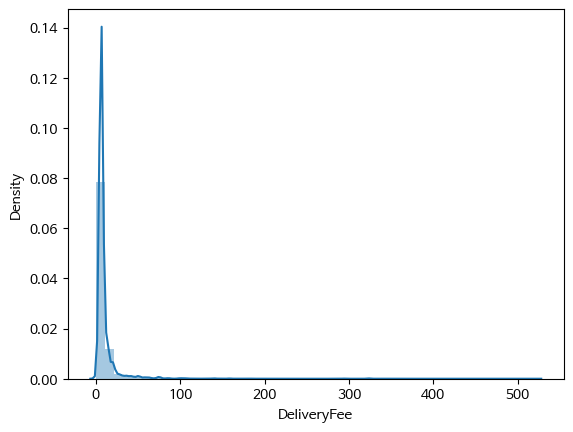

In [ ]:
# Visualize the distribution of delivery fees
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

%matplotlib inline
# plt.style.use(['dark_background'])

sns.distplot(df_o['DeliveryFee']);

In [ ]:
temp = df_o[df_o['DeliveryFee'] >= 100]
temp.head(10)

,CustomerID,TransactionID,TransactionDate,ProductID,ProductCategory,Quantity,UnitPrice,DeliveryFee,CouponApplied
26,USER_0066,Transaction_0009,2019-01-01,Product_0185,Office,1,2.47,102.79,Used
27,USER_0066,Transaction_0009,2019-01-01,Product_0879,Drinkware,26,8.72,102.79,Clicked
28,USER_0066,Transaction_0009,2019-01-01,Product_0904,Office,1,1.64,102.79,Clicked
29,USER_0066,Transaction_0009,2019-01-01,Product_1134,Office,1,1.64,102.79,Clicked
30,USER_0066,Transaction_0009,2019-01-01,Product_1142,Notebooks & Journals,26,7.93,102.79,Not Used
317,USER_0284,Transaction_0176,2019-01-03,Product_0942,Office,62,2.00,122.74,Clicked
318,USER_0867,Transaction_0176,2019-01-03,Product_0956,Notebooks & Journals,62,15.96,122.74,Used
324,USER_0867,Transaction_0180,2019-01-03,Product_0177,Bottles,62,2.39,210.44,Clicked
325,USER_0867,Transaction_0180,2019-01-03,Product_0848,Bags,12,13.19,210.44,Clicked
326,USER_0867,Transaction_0180,2019-01-03,Product_0854,Bags,62,3.98,210.44,Clicked


```
Delivery fees seem to increase based on the number of items per Transaction ID, so they are not considered outliers.
```

2. Customer_info

In [ ]:
df_c.head()

,CustomerID,Gender,Region,MonthsAsCustomer
0,USER_1358,Male,Chicago,12
1,USER_0190,Male,California,43
2,USER_0066,Male,Chicago,33
3,USER_0345,Female,California,30
4,USER_0683,Male,California,49


In [ ]:
# Data shape
print('df_c', df_c.shape)  # 1,468 rows, 4 cols

df_c (1468, 4)


In [ ]:
# Data type
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        1468 non-null   object
 1   Gender            1468 non-null   object
 2   Region            1468 non-null   object
 3   MonthsAsCustomer  1468 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 46.0+ KB


In [ ]:
# Check for missing values
print(df_c.isnull().sum())

CustomerID          0
Gender              0
Region              0
MonthsAsCustomer    0
dtype: int64


In [ ]:
# Check for outliers
df_c.describe()

,MonthsAsCustomer
count,1468.000000
mean,25.912125
std,13.959667
min,2.000000
25%,14.000000
50%,26.000000
75%,38.000000
max,50.000000


3. DIscount_info

In [ ]:
df_d.head()

,Month,ProductCategory,CouponCode,DiscountRate
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [ ]:
# Data shape
print('df_d', df_d.shape)  # 204 rows, 4 cols

df_d (204, 4)


In [ ]:
# Data type
df_d.info()  # Non-null counts match row count — no missing values detected.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Month            204 non-null    object
 1   ProductCategory  204 non-null    object
 2   CouponCode       204 non-null    object
 3   DiscountRate     204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [ ]:
# Check for outliers
df_d.describe()

,DiscountRate
count,204.000000
mean,20.000000
std,8.185052
min,10.000000
25%,10.000000
50%,20.000000
75%,30.000000
max,30.000000


4. Tax_info

In [ ]:
df_t.head()

,ProductCategory,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


In [ ]:
# Data shape
print('df_t', df_t.shape)  # 20 rows, 2 cols

df_t (20, 2)


In [ ]:
# Data type
df_t.info()  # Non-null counts match row count — no missing values detected.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ProductCategory  20 non-null     object 
 1   GST              20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 452.0+ bytes


In [ ]:
# Check for outliers
df_t.describe()

,GST
count,20.000000
mean,0.116500
std,0.052443
min,0.050000
25%,0.087500
50%,0.100000
75%,0.180000
max,0.180000


### · EDA
---
- **Data collection period**: January 1, 2019 – December 31, 2019  
- **Number of customers with transactions during the period**: 1,468  
- **PurchaseAmount** is calculated as:  
  Quantity × Unit Price × (1 - Discount Rate) × (1 + GST)  
  *(For transactions without a coupon, the discount rate is 0%)*  
- In 2019, total purchase amounts were highest in **November and December**, while **May and June** had the lowest.  
- Most customers made purchases **within a two-week cycle**.  
- The gender distribution shows that **female customers account for 63.6%** and **male customers for 36.4%**,  
  indicating that the female user ratio is approximately **1.7 times higher**.


In [ ]:
df_o.head()

,CustomerID,TransactionID,TransactionDate,ProductID,ProductCategory,Quantity,UnitPrice,DeliveryFee,CouponApplied
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used


In [ ]:
# Check transaction date range
df_o['TransactionDate'].min(), df_o['TransactionDate'].max()

('2019-01-01', '2019-12-31')

In [ ]:
# Number of customers who made purchases during the period
df_o['CustomerID'].nunique()

1468

In [ ]:
# Total number of transactions during the period
# Since the same Transaction ID can be shared by different customers,
# we first count the number of unique Transaction IDs per customer, then sum them up to get the total.

temp = pd.DataFrame(df_o.groupby('CustomerID')['TransactionID'].nunique())
temp['TransactionID'].sum()

26631


Check the Purchase Amount


In [ ]:
# Preprocess date column to join with discount data
dfo = df_o.copy()
dfo['TransactionDate'] = pd.to_datetime(dfo['TransactionDate'])

# Extract month from transaction date
dfo['Month'] = dfo['TransactionDate'].dt.strftime('%b')

# Join online transaction records with coupon discount information
dfd = df_d.copy()
df_od = pd.merge(left = dfo, right = dfd, how = 'left', on = ['Month', 'ProductCategory'])

# Join with tax information to apply GST
dft = df_t.copy()
df_odt = pd.merge(left = df_od, right= dft, how = 'left', on = 'ProductCategory')

In [ ]:
# Check the joined dataset — some null values appear to be present
df_odt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52924 entries, 0 to 52923
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       52924 non-null  object        
 1   TransactionID    52924 non-null  object        
 2   TransactionDate  52924 non-null  datetime64[ns]
 3   ProductID        52924 non-null  object        
 4   ProductCategory  52924 non-null  object        
 5   Quantity         52924 non-null  int64         
 6   UnitPrice        52924 non-null  float64       
 7   DeliveryFee      52924 non-null  float64       
 8   CouponApplied    52924 non-null  object        
 9   Month            52924 non-null  object        
 10  CouponCode       52524 non-null  object        
 11  DiscountRate     52524 non-null  float64       
 12  GST              52924 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 5.7+ MB


In [ ]:
# Check for missing values
print(df_odt.isnull().sum())

CustomerID           0
TransactionID        0
TransactionDate      0
ProductID            0
ProductCategory      0
Quantity             0
UnitPrice            0
DeliveryFee          0
CouponApplied        0
Month                0
CouponCode         400
DiscountRate       400
GST                  0
dtype: int64


In [ ]:
# Check rows with null values in the CouponCode column
df_odt[df_odt['CouponCode'].isnull()]

,CustomerID,TransactionID,TransactionDate,ProductID,ProductCategory,Quantity,UnitPrice,DeliveryFee,CouponApplied,Month,CouponCode,DiscountRate,GST
62,USER_1358,Transaction_0020,2019-01-01,Product_1138,Fun,4,9.27,6.50,Used,Jan,NaN,NaN,0.18
95,USER_0585,Transaction_0046,2019-01-02,Product_0863,Backpacks,1,103.15,6.50,Clicked,Jan,NaN,NaN,0.10
157,USER_1421,Transaction_0078,2019-01-02,Product_0950,Fun,1,7.42,6.50,Used,Jan,NaN,NaN,0.18
178,USER_0906,Transaction_0095,2019-01-02,Product_0196,Fun,2,7.42,6.50,Not Used,Jan,NaN,NaN,0.18
193,USER_0954,Transaction_0105,2019-01-02,Product_0886,Google,1,11.54,17.96,Clicked,Jan,NaN,NaN,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44213,USER_0034,Transaction_19979,2019-10-30,Product_0863,Backpacks,1,79.99,6.00,Clicked,Oct,NaN,NaN,0.10
45167,USER_0643,Transaction_20483,2019-11-07,Product_0863,Backpacks,1,79.99,6.00,Not Used,Nov,NaN,NaN,0.10
45807,USER_1435,Transaction_20841,2019-11-12,Product_0863,Backpacks,1,99.99,6.00,Clicked,Nov,NaN,NaN,0.10
46239,USER_1174,Transaction_21068,2019-11-15,Product_0863,Backpacks,1,79.99,6.00,Used,Nov,NaN,NaN,0.10


In [ ]:
# For products without a coupon, replace CouponCode with 'NoDC' and DiscountRate with 0
df_odt.loc[df_odt['CouponCode'] != df_odt['CouponCode'], 'CouponCode'] = 'NoDC'
df_odt.loc[df_odt['DiscountRate'] != df_odt['DiscountRate'], 'DiscountRate'] = 0

print(df_odt.isnull().sum())


CustomerID         0
TransactionID      0
TransactionDate    0
ProductID          0
ProductCategory    0
Quantity           0
UnitPrice          0
DeliveryFee        0
CouponApplied      0
Month              0
CouponCode         0
DiscountRate       0
GST                0
dtype: int64


In [ ]:
# Calculate and add the final purchase amount considering discount and tax
import numpy as np
total_sales_dc = (df_odt['Quantity'] * df_odt['UnitPrice'] * (100 - df_odt['DiscountRate']) / 100) * (1+df_odt['GST'])
total_sales = (df_odt['Quantity'] * df_odt['UnitPrice']) * (1+df_odt['GST'])
df_odt['PurchaseAmount'] = np.where(df_odt['CouponApplied']=='Used', total_sales_dc, total_sales)

df_odt.head()

,CustomerID,TransactionID,TransactionDate,ProductID,ProductCategory,Quantity,UnitPrice,DeliveryFee,CouponApplied,Month,CouponCode,DiscountRate,GST,PurchaseAmount
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,152.1729
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,152.1729
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,0.10,2.0295
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,0.18,103.4270
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,0.18,17.5230


In [ ]:
df_odt.shape

(52924, 14)

Monthly Customer Activity

In [ ]:
df_odt.head()

,CustomerID,TransactionID,TransactionDate,ProductID,ProductCategory,Quantity,UnitPrice,DeliveryFee,CouponApplied,Month,CouponCode,DiscountRate,GST,PurchaseAmount
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,152.1729
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,152.1729
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,0.10,2.0295
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,0.18,103.4270
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,0.18,17.5230


In [ ]:
# Preprocess data to analyze customer activity by month
df_odt_c = df_odt.copy()
df_odt_c['TransactionMonth'] = df_odt_c["TransactionDate"].dt.strftime("%Y-%m")
df_odt_c.head(5)

,CustomerID,TransactionID,TransactionDate,ProductID,ProductCategory,Quantity,UnitPrice,DeliveryFee,CouponApplied,Month,CouponCode,DiscountRate,GST,PurchaseAmount,TransactionMonth
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,152.1729,2019-01
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,152.1729,2019-01
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,0.10,2.0295,2019-01
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,0.18,103.4270,2019-01
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,0.18,17.5230,2019-01


In [ ]:
df_m_cus = df_odt_c.groupby('TransactionMonth',as_index=False)['CustomerID'].nunique()
df_m_cus.tail(5)

,TransactionMonth,CustomerID
7,2019-08,300
8,2019-09,193
9,2019-10,210
10,2019-11,188
11,2019-12,236


In [ ]:
# Monthly transaction count
df_m_cnt = pd.DataFrame(df_odt_c.groupby(['TransactionMonth', 'CustomerID'])['TransactionID'].nunique().reset_index(name = 'TransactionCount'))
df_m_cnt = pd.DataFrame(df_m_cnt.groupby(['TransactionMonth'])['TransactionCount'].sum())
df_m_cnt

,TransactionCount
TransactionMonth,
2019-01,2231
2019-02,1719
2019-03,2120
2019-04,1963
2019-05,2160
2019-06,2091
2019-07,2266
2019-08,2640
2019-09,2055


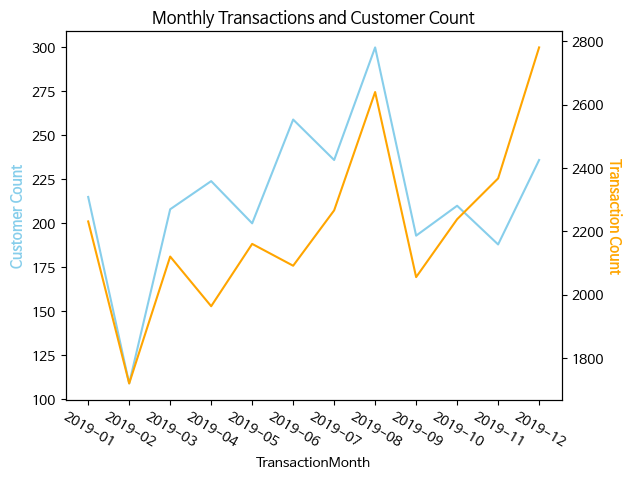

In [ ]:
# Visualize monthly transaction and customer activity
ax1 = sns.lineplot(data = df_m_cus, x = df_m_cus['TransactionMonth'], y = df_m_cus['CustomerID'], color = 'skyblue')
ax1.set_ylabel('Customer Count', color = 'skyblue', weight = 'bold')
plt.xticks(rotation = -30)

ax2 = ax1.twinx()
ax2 = sns.lineplot(data = df_m_cnt, x = df_m_cnt.index, y =  df_m_cnt['TransactionCount'], color = 'orange')
ax2.set_ylabel('Transaction Count', rotation = -90, labelpad = 13.0, color = 'orange', weight = 'bold')

plt.title('Monthly Transactions and Customer Count')
plt.show()

```
After a brief dip in February 2019, customer activity recovered starting in March and peaked in August.
Following a slight decline, the trend began rising again toward the end of the year.
Transaction volume followed a similar pattern to the monthly customer trend.

```

In [ ]:
# Monthly purchase amount
monthly_sales = pd.DataFrame(df_odt.groupby('Month')['PurchaseAmount'].sum())

# Reorder months in chronological order
idx = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_sales = monthly_sales.reindex(idx)

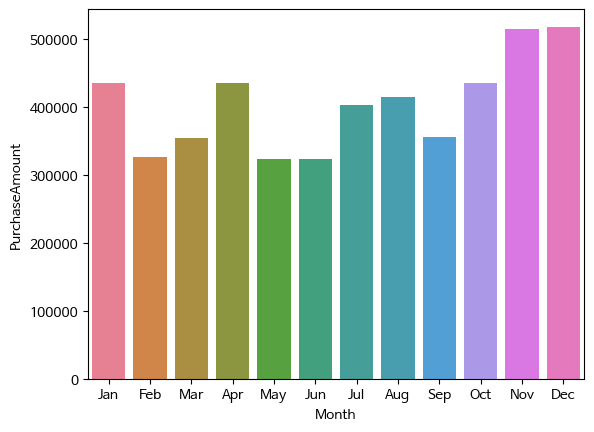

In [ ]:
# Visualize monthly sales amount
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

%matplotlib inline
# plt.style.use(['dark_background'])

sns.barplot(monthly_sales, x = monthly_sales.index, y = 'PurchaseAmount', hue = 'Month');

```
Purchase amounts were highest in November and December, likely due to major shopping events such as Black Friday and Christmas.
In contrast, sales in May and June were relatively lower compared to other months.

```

In [ ]:
# Check total purchase amount by product category

pd.options.display.float_format = '{:.2f}'.format  # Display floats instead of scientific notation
cat_sales = pd.DataFrame(df_odt.groupby('ProductCategory')['PurchaseAmount'].sum())
cat_sales.sort_values(by = 'PurchaseAmount', ascending = False, inplace = True)
cat_sales

,PurchaseAmount
ProductCategory,
Nest-USA,2622005.70
Apparel,650964.77
Nest,504570.87
Office,283497.36
Drinkware,222493.78
Bags,167981.56
Notebooks & Journals,106610.16
Lifestyle,82039.84
Nest-Canada,73342.81


```
The Nest-USA product category recorded the highest total purchase amount.
It was followed by Apparel, Nest, and Office Supplies, which also showed relatively high sales.
```

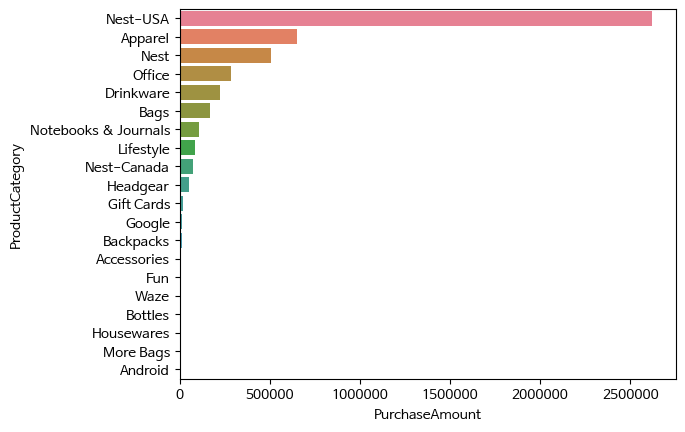

In [ ]:
# Visualization
ax = sns.barplot(cat_sales, x = 'PurchaseAmount', y = 'ProductCategory', hue = 'ProductCategory')
ax.get_xaxis().get_major_formatter().set_scientific(False);

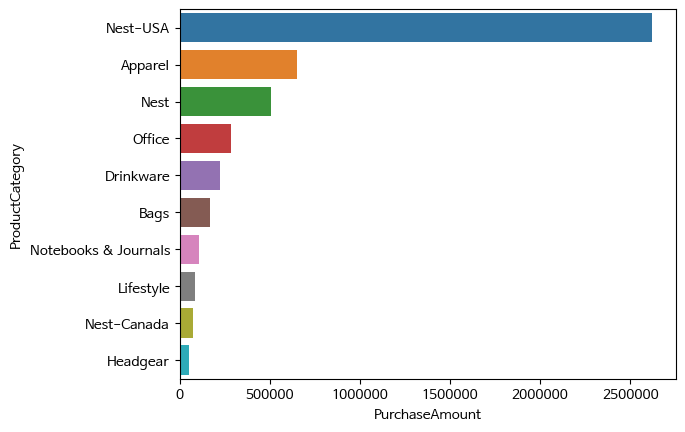

In [ ]:
# Visualize top 10 product categories by total purchase amount
cat_sales_top10 = cat_sales.iloc[:10]

ax = sns.barplot(cat_sales_top10, x = 'PurchaseAmount', y = 'ProductCategory', hue = 'ProductCategory')
ax.get_xaxis().get_major_formatter().set_scientific(False);

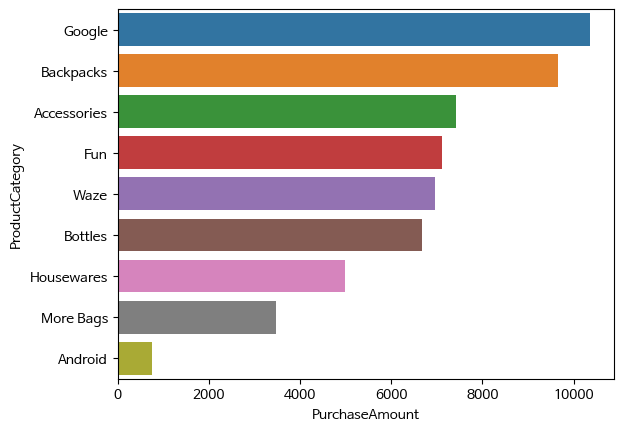

In [ ]:
cat_sales_bottom10 = cat_sales.iloc[11:]
sns.barplot(cat_sales_bottom10, x = 'PurchaseAmount', y = 'ProductCategory', hue = 'ProductCategory');

Calculate transaction cycle for customers in 2019  
– Target: Customers with more than one transaction, starting from the day after their first purchase in 2019  
– Transaction cycle = (LastTransactionDate − FirstTransactionDate) / (Number of transactions − 1)  
– Create a new DataFrame for transaction cycle analysis

  
  stat_df Description
  

  |Column|Description|
  |:---|:---|
  |CustomerID|Unique customer ID|
  |FirstTransactionDate|Date of the customer's first transaction|
  |LastTransactionDate|Date of the customer's most recent transaction|
  |TransactionCount|Total number of transactions|
  |PurchaseAmount|Total purchase amount during the transaction period|

In [ ]:
df_odt.head(3)

,CustomerID,TransactionID,TransactionDate,ProductID,ProductCategory,Quantity,UnitPrice,DeliveryFee,CouponApplied,Month,CouponCode,DiscountRate,GST,PurchaseAmount
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,10.00,0.10,152.17
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,10.00,0.10,152.17
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,Jan,OFF10,10.00,0.10,2.03


In [ ]:
# Create a DataFrame to calculate transaction intervals
stat_df = pd.DataFrame(df_odt.groupby('CustomerID').agg({'TransactionDate' : ['min', 'max'], 'TransactionID' : 'nunique', 'PurchaseAmount' : 'sum'}))

# Rename the columns
stat_df.columns = ['FirstTransactionDate', 'LastTransactionDate', 'TransactionCount', 'PurchaseAmount']
stat_df.reset_index(inplace = True)

In [ ]:
# Copy data and filter customers with a transaction period longer than 1 day
stat_c = stat_df.copy()
stat_c = stat_c[(stat_c['LastTransactionDate'] - stat_c['FirstTransactionDate']).dt.days > 1]

# Keep only customers with at least 2 transactions
stat_c = stat_c[stat_c['TransactionCount'] >= 2]

In [ ]:
# Calculate transaction cycle
stat_c['diff'] = (stat_c['LastTransactionDate'] - stat_c['FirstTransactionDate'])
stat_c['cycle'] = stat_c['diff'] / (stat_c['TransactionCount'] - 1)
stat_c['cycle_days'] = stat_c['cycle'].dt.days

# Sort by transaction cycle
stat_c.sort_values(by = 'cycle', inplace = True)

# Remove customers with 0-day transaction span
stat_c = stat_c[stat_c['diff'] != '0 days']

In [ ]:
# Check summary statistics for transaction cycle (in days
stat_c['cycle_days'].describe()

,cycle_days
count,617.00
mean,12.21
std,19.47
min,0.00
25%,3.00
50%,6.00
75%,14.00
max,172.00


```
The average transaction cycle was approximately 12 days, and the median was 6 days.
This indicates that most customers had a purchase cycle of less than two weeks.
```

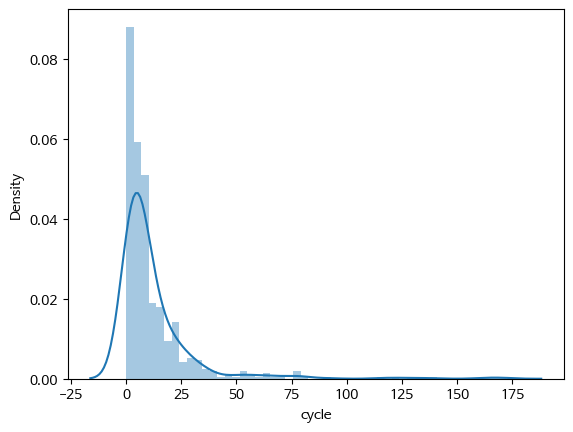

In [ ]:
# Plot distribution of transaction cycle (in days)
ax = sns.distplot(stat_c['cycle'].dt.days)
ax.get_xaxis().get_major_formatter().set_scientific(False);

In [ ]:
df_odt.head()

,CustomerID,TransactionID,TransactionDate,ProductID,ProductCategory,Quantity,UnitPrice,DeliveryFee,CouponApplied,Month,CouponCode,DiscountRate,GST,PurchaseAmount
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,10.00,0.10,152.17
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,10.00,0.10,152.17
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,Jan,OFF10,10.00,0.10,2.03
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,Jan,SALE10,10.00,0.18,103.43
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,Jan,AIO10,10.00,0.18,17.52


In [ ]:
# Calculate total purchase amount and average delivery fee per CustomerID and TransactionID
gp1 = pd.DataFrame(df_odt.groupby(['CustomerID', 'TransactionID']).agg({'PurchaseAmount' : 'sum', 'DeliveryFee' : 'mean'}))
gp1 = gp1.reset_index()
gp1

,CustomerID,TransactionID,PurchaseAmount,DeliveryFee
0,USER_0000,Transaction_16900,24.98,75.00
1,USER_0001,Transaction_20178,12.48,20.85
2,USER_0001,Transaction_20179,21.66,6.00
3,USER_0001,Transaction_20180,163.90,6.00
4,USER_0001,Transaction_20181,163.90,6.00
...,...,...,...,...
26626,USER_1467,Transaction_18634,103.95,6.00
26627,USER_1467,Transaction_18635,39.11,6.00
26628,USER_1467,Transaction_18636,25.47,6.50
26629,USER_1467,Transaction_18637,52.02,6.00


Use Customer_info

In [ ]:
df_o.head()

,CustomerID,TransactionID,TransactionDate,ProductID,ProductCategory,Quantity,UnitPrice,DeliveryFee,CouponApplied
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used


In [ ]:
# Join with Customer_info to add gender and region data
df_oc = pd.merge(left = df_o, right = df_c, how = 'left', on = 'CustomerID')

# Check gender distribution among customers
gp_s = pd.DataFrame(df_oc.groupby('Gender')['CustomerID'].nunique().reset_index(name = 'CustomerID'))
gp_s

,Gender,CustomerID
0,Female,934
1,Male,534


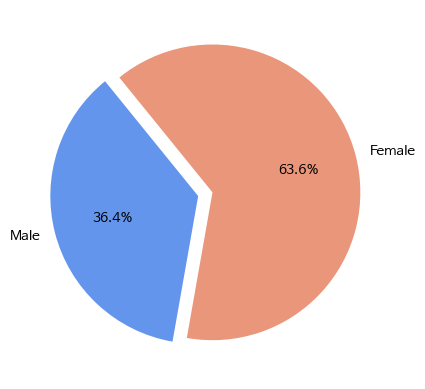

In [ ]:
import matplotlib.pyplot as plt

ratio = [534/1468, 934/1468]
labels = ['Male', 'Female']
explode = [0.05, 0.05]
colors = ['#6495ED', '#E9967A']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, colors=colors)
plt.show()

```
Female users accounted for 63.6% and male users for 36.4%,
indicating that the proportion of female customers was approximately 1.7 times higher than that of male customers.
```

In [ ]:
# Check customer distribution by region
gp_r = pd.DataFrame(df_oc.groupby('Region')['CustomerID'].nunique().reset_index(name = 'CustomerCount'))

# Sort regions by number of customers
gp_r.sort_values(by = 'CustomerCount', ascending = False, inplace = True)
gp_r

,Region,CustomerCount
0,California,464
1,Chicago,456
3,New York,324
2,New Jersey,149
4,Washington DC,75


In [ ]:
# Check customer distribution by months since joining

gp_p = pd.DataFrame(df_oc.groupby('MonthsAsCustomer')['CustomerID'].nunique().reset_index(name = 'CustomerCount'))

gp_p

,MonthsAsCustomer,CustomerCount
0,2,26
1,3,23
2,4,38
3,5,30
4,6,36
5,7,31
6,8,28
7,9,28
8,10,34
9,11,25


## 🔉**Process 2**

### · RFM Segmentation
---

#### RFM Scoring Criteria  

Recency (R): How recently a customer made a purchase  
– The reference date is set to January 1, 2020, and recency is calculated based on the number of days since the last purchase.  
<br>
Frequency (F): How often a customer makes purchases  
– Frequency is measured by the number of unique transactions per customer.  
<br>

Monetary (M): How much money a customer spends  
– Purchase amount is calculated as:  
&nbsp;&nbsp;&nbsp;&nbsp;`Quantity × Unit Price × (1 − Discount Rate) × (1 + GST)`  
– If no coupon was applied, the discount rate is considered 0%.  
– Delivery fees are excluded from the monetary value.

In [ ]:
# Preview the DataFrame to be used for R, F, and M calculations
df_odt.head()

,CustomerID,TransactionID,TransactionDate,ProductID,ProductCategory,Quantity,UnitPrice,DeliveryFee,CouponApplied,Month,CouponCode,DiscountRate,GST,PurchaseAmount
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,10.00,0.10,152.17
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,10.00,0.10,152.17
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,Jan,OFF10,10.00,0.10,2.03
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,Jan,SALE10,10.00,0.18,103.43
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,Jan,AIO10,10.00,0.18,17.52


Recency: Calculate how many days have passed since the last transaction as of Jan 1, 2020

In [ ]:
# Get the last transaction date for each customer in 2019
r = pd.DataFrame(df_odt.groupby('CustomerID')['TransactionDate'].max().reset_index(name = 'LastTransactionDate'))
r.sort_values(by = 'LastTransactionDate', ascending = False, inplace = True)

r.head()

,CustomerID,LastTransactionDate
513,USER_0513,2019-12-31
563,USER_0563,2019-12-31
562,USER_0562,2019-12-31
504,USER_0504,2019-12-31
167,USER_0167,2019-12-31


In [ ]:
# Calculate Recency as the number of days since the last purchase (based on Jan 1, 2020)
from datetime import datetime
s_date = datetime(2020, 1, 1)
r['Recency'] = (s_date - r['LastTransactionDate']).dt.days
r.head()

,CustomerID,LastTransactionDate,Recency
513,USER_0513,2019-12-31,1
563,USER_0563,2019-12-31,1
562,USER_0562,2019-12-31,1
504,USER_0504,2019-12-31,1
167,USER_0167,2019-12-31,1


Frequency: How many purchases a customer made,
measured by the number of unique transaction IDs per CustomerID.

In [ ]:
f = pd.DataFrame(df_odt.groupby('CustomerID')['TransactionID'].nunique().reset_index(name = 'Frequency'))
f.head()

,CustomerID,Frequency
0,USER_0000,1
1,USER_0001,31
2,USER_0002,8
3,USER_0003,11
4,USER_0004,13


Monetary: The total amount of money spent by each customer.

In [ ]:
# Preview the data used for calculating Monetary value
gp1.head()

,CustomerID,TransactionID,PurchaseAmount,DeliveryFee
0,USER_0000,Transaction_16900,24.98,75.00
1,USER_0001,Transaction_20178,12.48,20.85
2,USER_0001,Transaction_20179,21.66,6.00
3,USER_0001,Transaction_20180,163.90,6.00
4,USER_0001,Transaction_20181,163.90,6.00


In [ ]:
m = pd.DataFrame(gp1.groupby('CustomerID')['PurchaseAmount'].sum().reset_index(name = 'Monetary'))

m.head()

,CustomerID,Monetary
0,USER_0000,24.98
1,USER_0001,15021.70
2,USER_0002,1492.41
3,USER_0003,1339.56
4,USER_0004,1369.94


In [ ]:
temp = pd.merge(left = r, right = f, how = 'left', on = 'CustomerID')
rfm = pd.merge(left = temp, right = m, how = 'left', on = 'CustomerID')
rfm.drop('LastTransactionDate', axis = 'columns', inplace = True)
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,USER_0513,1,5,491.43
1,USER_0563,1,289,59096.83
2,USER_0562,1,2,797.15
3,USER_0504,1,6,1131.14
4,USER_0167,1,14,3150.17


#### · RFM Scoring
---
  - Each of Recency, Frequency, and Monetary is scored based on quartiles.
  - A lower Recency means a more recent purchase, so it receives a higher score.
In contrast, higher Frequency and Monetary values receive higher scores.
  - R
    - 0 ~ 25% : 4 / 26 ~ 50% : 3 / 51 ~ 75% : 2 / 76 ~ 100% : 1
  - F, M
    - 0 ~ 25% : 1 / 26 ~ 50% : 2 / 51 ~ 75% : 3 / 76 ~ 100% : 4

  




R (Recency): Days since the last purchase as of January 1, 2020

F (Frequency): Number of unique transactions per customer (based on Transaction ID)

M (Monetary): Total purchase amount excluding delivery fees



In [ ]:
rfm.describe()

,Recency,Frequency,Monetary
count,1468.00,1468.00,1468.00
mean,145.29,18.14,3297.50
std,101.94,24.98,5300.08
min,1.00,1.00,0.99
25%,56.00,5.00,673.30
50%,132.00,11.00,1796.66
75%,221.00,23.00,4078.97
max,365.00,328.00,82073.78


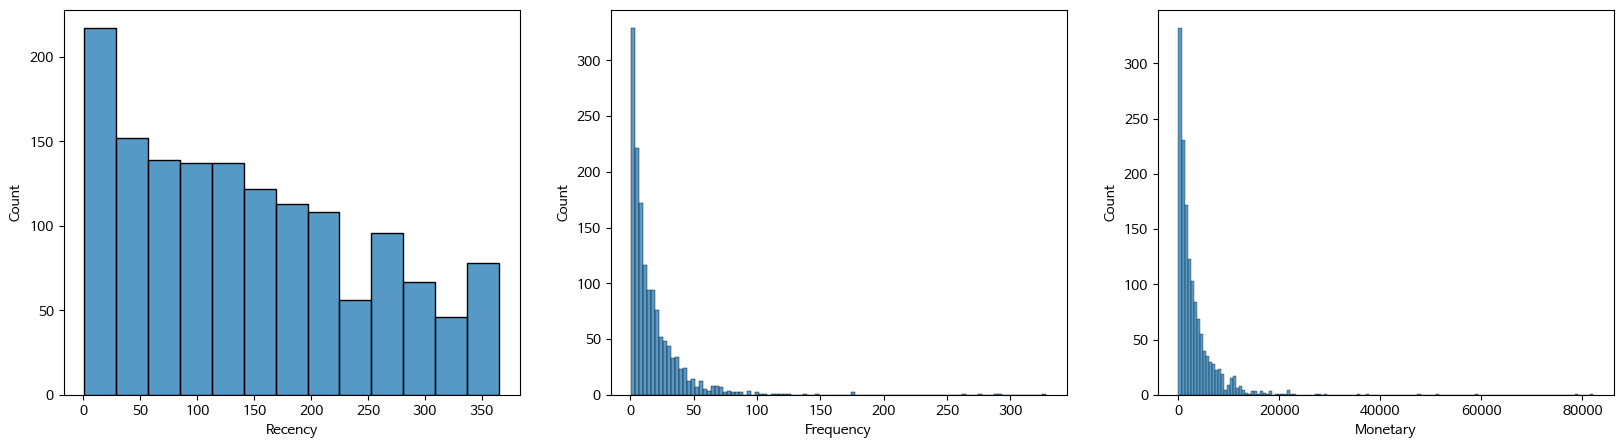

In [ ]:
# Visualize the distribution of Recency, Frequency, and Monetary values
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols = 3, figsize = (20, 5))

sns.histplot(rfm['Recency'], ax = ax[0])
sns.histplot(rfm['Frequency'], ax = ax[1])
sns.histplot(rfm['Monetary'], ax = ax[2]);

```
Compared to Recency, both Frequency and Monetary values are heavily skewed toward a specific range.
```

Scoring R, F, and M based on quartiles  
⚠️ Note: For Recency, lower values receive higher scores.



In [ ]:
rfm_c = rfm.copy()
rfm_c.head()

,CustomerID,Recency,Frequency,Monetary
0,USER_0513,1,5,491.43
1,USER_0563,1,289,59096.83
2,USER_0562,1,2,797.15
3,USER_0504,1,6,1131.14
4,USER_0167,1,14,3150.17


In [ ]:
# RFM Scoring
r_labels = range(4, 0, -1)
f_m_labels = range(1, 5)

r_score = pd.qcut(rfm_c['Recency'], q = 4, labels = r_labels)
f_score = pd.qcut(rfm_c['Frequency'], q = 4, labels = f_m_labels)
m_score = pd.qcut(rfm_c['Monetary'], q = 4, labels = f_m_labels)

rfm_score = rfm_c.assign(R = r_score, F = f_score, M = m_score)
rfm_score[['R', 'F', 'M']] = rfm_score[['R', 'F', 'M']].apply(pd.to_numeric)

rfm_score['RFM_Score'] = rfm_score[['R', 'F', 'M']].sum(axis = 1)
rfm_score

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,USER_0513,1,5,491.43,4,1,1,6
1,USER_0563,1,289,59096.83,4,4,4,12
2,USER_0562,1,2,797.15,4,1,2,7
3,USER_0504,1,6,1131.14,4,2,2,8
4,USER_0167,1,14,3150.17,4,3,3,10
...,...,...,...,...,...,...,...,...
1463,USER_0922,364,5,910.13,1,1,2,4
1464,USER_1249,364,5,605.05,1,1,1,3
1465,USER_1421,364,12,1969.79,1,3,3,7
1466,USER_0954,364,8,2132.89,1,2,3,6


In [ ]:
rfm_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468 entries, 0 to 1467
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  1468 non-null   object 
 1   Recency     1468 non-null   int64  
 2   Frequency   1468 non-null   int64  
 3   Monetary    1468 non-null   float64
 4   R           1468 non-null   int64  
 5   F           1468 non-null   int64  
 6   M           1468 non-null   int64  
 7   RFM_Score   1468 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 103.2+ KB


In [ ]:
rfm_score.describe()

,Recency,Frequency,Monetary,R,F,M,RFM_Score
count,1468.00,1468.00,1468.00,1468.00,1468.00,1468.00,1468.00
mean,145.29,18.14,3297.50,2.51,2.44,2.50,7.45
std,101.94,24.98,5300.08,1.12,1.15,1.12,2.74
min,1.00,1.00,0.99,1.00,1.00,1.00,3.00
25%,56.00,5.00,673.30,2.00,1.00,1.75,5.00
50%,132.00,11.00,1796.66,3.00,2.00,2.50,7.00
75%,221.00,23.00,4078.97,4.00,3.00,3.25,10.00
max,365.00,328.00,82073.78,4.00,4.00,4.00,12.00


In [ ]:
# Check customer distribution by Total RFM Score
total_gp = pd.DataFrame(rfm_score.groupby('RFM_Score')['CustomerID'].nunique().reset_index(name = 'CustomerCount'))

total_gp

,RFM_Score,CustomerCount
0,3,113
1,4,149
2,5,163
3,6,170
4,7,162
5,8,149
6,9,154
7,10,156
8,11,127
9,12,125


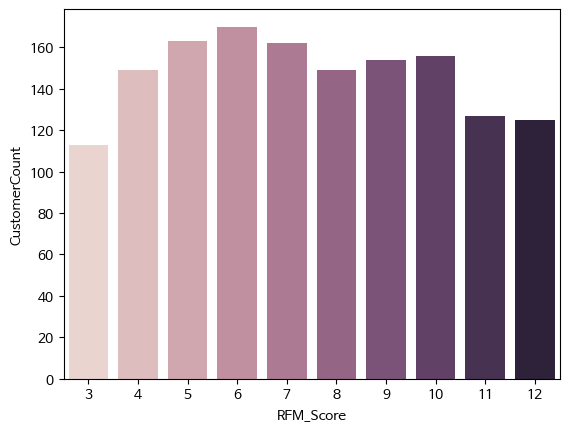

In [ ]:
# Visualization
ax = sns.barplot(data = total_gp, x = 'RFM_Score', y = 'CustomerCount', hue = 'RFM_Score', legend = False);

####  · Clustering
---
- We applied the K-Means clustering algorithm to segment customers based on their RFM scores.

In [ ]:
rfm_sc = rfm_score[['R', 'F', 'M']]
rfm_sc.describe()

,R,F,M
count,1468.00,1468.00,1468.00
mean,2.51,2.44,2.50
std,1.12,1.15,1.12
min,1.00,1.00,1.00
25%,2.00,1.00,1.75
50%,3.00,2.00,2.50
75%,4.00,3.00,3.25
max,4.00,4.00,4.00


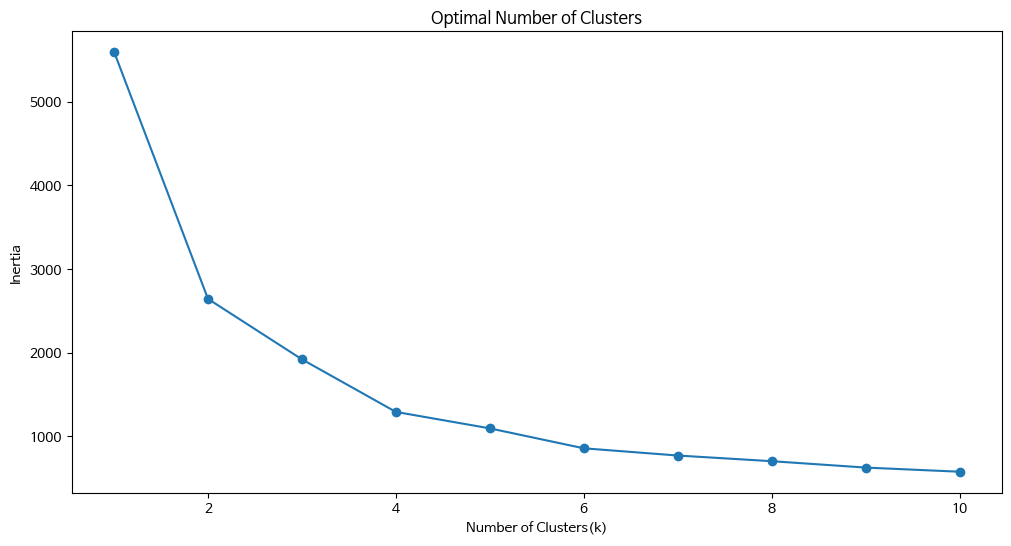

In [ ]:
# Clustering without scaling since R, F, M scores are already on the same scale

# Determine the optimal number of clusters (k)
from sklearn.cluster import KMeans

k_list = range(1, 11)
inertia_list = []

for k in k_list:
  k_cluster = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, random_state = 42)
  k_cluster.fit(rfm_sc)
  inertia_list.append(k_cluster.inertia_)


# Visualize the Elbow Method to choose optimal k
fig, ax = plt.subplots(figsize=(12, 6))

# plt.style.use(['dark_background'])
plt.plot(k_list, inertia_list, '-o')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Inertia')
plt.title('Optimal Number of Clusters')
plt.show()

```
Based on the elbow plot, using 4 clusters seems to be a reasonable choice.
```

In [ ]:
# Perform K-Means clustering
cluster = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, random_state = 123)
cluster.fit(rfm_sc)

# Create a column for cluster labels
cluster_labels = cluster.labels_

rfm_k4 = rfm_score.assign(K_cluster = cluster_labels)

rfm_k4

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score,K_cluster
0,USER_0513,1,5,491.43,4,1,1,6,2
1,USER_0563,1,289,59096.83,4,4,4,12,1
2,USER_0562,1,2,797.15,4,1,2,7,2
3,USER_0504,1,6,1131.14,4,2,2,8,2
4,USER_0167,1,14,3150.17,4,3,3,10,1
...,...,...,...,...,...,...,...,...,...
1463,USER_0922,364,5,910.13,1,1,2,4,0
1464,USER_1249,364,5,605.05,1,1,1,3,0
1465,USER_1421,364,12,1969.79,1,3,3,7,3
1466,USER_0954,364,8,2132.89,1,2,3,6,3


In [ ]:
# Check silhouette score to evaluate clustering quality
from sklearn.metrics import silhouette_score, silhouette_samples
print('Silhouette Score : {0:.3f}'.format(silhouette_score(rfm_sc, cluster_labels)))


Silhouette Score : 0.443


In [ ]:
# Check average silhouette coefficient for each cluster
from sklearn.metrics import silhouette_score, silhouette_samples
rfm_sil = rfm_k4.copy()

rfm_sil['silhouette_coeff'] = silhouette_samples(rfm_sc, rfm_sil['K_cluster'])  # 실루엣 계수 칼럼 추가
rfm_sil.groupby('K_cluster')['silhouette_coeff'].mean()

,silhouette_coeff
K_cluster,
0,0.49
1,0.52
2,0.36
3,0.37


```
Clusters 2 and 3 show relatively lower average silhouette scores,
suggesting they may have less distinct boundaries compared to Clusters 0 and 1.
```

In [ ]:
# Check R, F, M values and RFM Score statistics by cluster
rfm_k4.groupby('K_cluster').agg({'R' : ['min', 'max', 'mean'],
                                  'F' : ['min', 'max', 'mean'],
                                  'M' : ['min', 'max', 'mean'],
                                  'RFM_Score' : ['min', 'max', 'mean']})

R            F            M          RFM_Score          
          min max mean min max mean min max mean       min max  mean
K_cluster                                                           
0           1   2 1.47   1   2 1.37   1   3 1.43         3   6  4.27
1           3   4 3.57   3   4 3.60   3   4 3.60         9  12 10.77
2           3   4 3.41   1   3 1.61   1   3 1.76         5   9  6.78
3           1   2 1.53   1   4 3.26   2   4 3.29         6  10  8.08

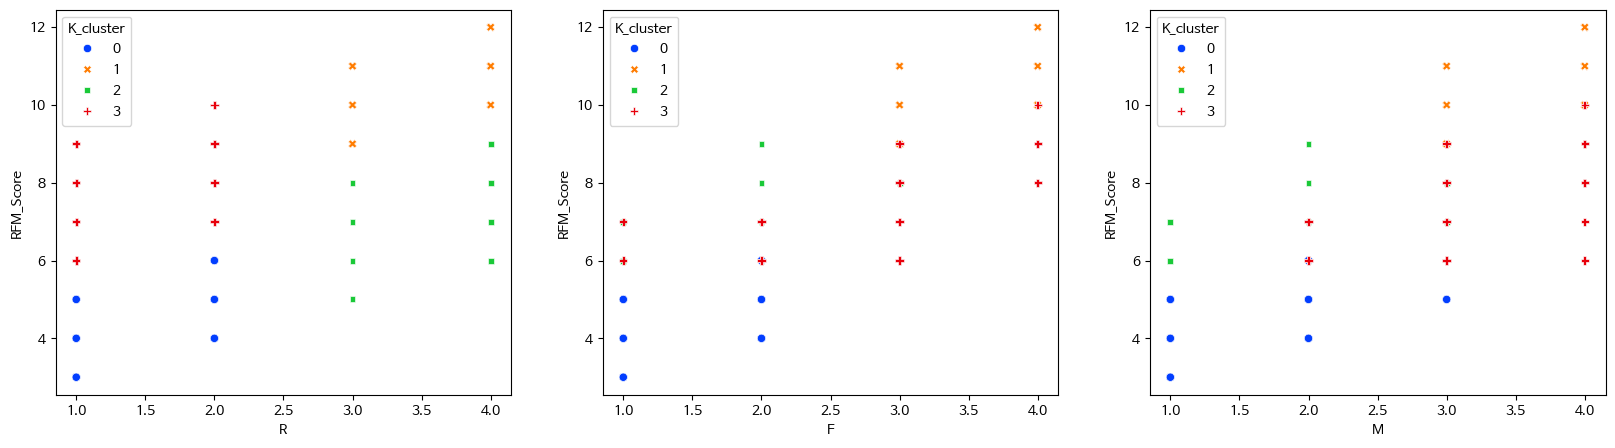

In [ ]:
fig, ax = plt.subplots(ncols = 3, figsize = (20, 5))

sns.scatterplot(data = rfm_k4, x = 'R', y = 'RFM_Score', hue = 'K_cluster', style = 'K_cluster', palette = 'bright',  ax = ax[0])
sns.scatterplot(data = rfm_k4, x = 'F', y = 'RFM_Score', hue = 'K_cluster', style = 'K_cluster', palette = 'bright',  ax = ax[1])
sns.scatterplot(data = rfm_k4, x = 'M', y = 'RFM_Score', hue = 'K_cluster', style = 'K_cluster', palette = 'bright',  ax = ax[2]);

```
Although Clusters 2 and 3 have relatively lower silhouette scores,
Clusters 0 and 1 show clearly distinguishable characteristics.
Considering the differences in R, F, and M values across the clusters,
we determined that the segmentation is meaningful and decided to proceed with the analysis using this clustering result.
```

```
Cluster 1 (Loyal):
High-value customers who purchase frequently and have visited recently.
They are considered loyal and highly engaged.

Cluster 3 (Enthusiast):
Potentially valuable but at-risk customers.
They have relatively high spending, but visit less frequently and haven’t made recent purchases.

Cluster 2 (Potential):
Recently active customers with lower purchase frequency and spending.
They have potential to grow if nurtured properly.

Cluster 0 (Lost):
Inactive or at-risk customers who haven’t visited recently and have low purchase frequency and spending.
Retention strategies may be needed or they may already be lost.

```

####  · Purchase Characteristics by Customer Segment
---
- The Lost customer group accounts for the largest proportion, followed closely by the Loyal group.
- From **January to August**, all customer segments were actively present.
- From **September to December**, the proportions of Loyal and Potential customers increased.  
This is likely because the other segments did not have any transactions during this period,
resulting in Loyal and Potential customers dominating the monthly proportions.



In [ ]:
# Check the number of customers in each cluster
cluster_gp = pd.DataFrame(rfm_k4.groupby('K_cluster')['CustomerID'].nunique().reset_index(name = 'CustomerCount'))

# Reorder cluster labels for visualization
cluster_gp = cluster_gp.reindex(index = [1, 3, 2, 0])
cluster_gp.reset_index(drop = True, inplace = True)
cluster_gp

,K_cluster,CustomerCount
0,1,416
1,3,303
2,2,325
3,0,424


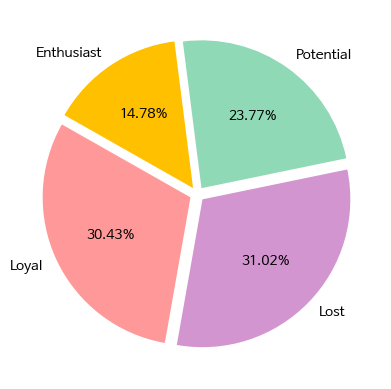

In [ ]:
# Visualize customer distribution by cluster (Pie Chart)
import matplotlib.pyplot as plt

ratio = [416/1468, 202/1468, 325/1468, 424/1468]
labels = ['Loyal', 'Enthusiast', 'Potential', 'Lost']
explode = [0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']

plt.pie(ratio, labels=labels, autopct='%.2f%%', startangle=260, counterclock=False, explode=explode, colors=colors)
plt.show()


```
The Lost customer group accounts for the largest proportion, followed closely by the Loyal group.  
We aim to develop marketing strategies that reduce the number of Lost customers and increase the proportion of Loyal customers.

```

In [ ]:
# Join purchase data with customer information
df_odtc = pd.merge(left = df_odt, right = df_c, how = 'left', on = 'CustomerID')

df_odtc.head()

,CustomerID,TransactionID,TransactionDate,ProductID,ProductCategory,Quantity,UnitPrice,DeliveryFee,CouponApplied,Month,CouponCode,DiscountRate,GST,PurchaseAmount,Gender,Region,MonthsAsCustomer
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,10.00,0.10,152.17,Male,Chicago,12
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,10.00,0.10,152.17,Male,Chicago,12
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,Jan,OFF10,10.00,0.10,2.03,Male,Chicago,12
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,Jan,SALE10,10.00,0.18,103.43,Male,Chicago,12
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,Jan,AIO10,10.00,0.18,17.52,Male,Chicago,12


In [ ]:
# Add a column to categorize customers by membership duration

df_odtc['YearsAsCustomerGroup'] = np.where(df_odtc['MonthsAsCustomer']<=12, '≤1 year',
                           np.where(df_odtc['MonthsAsCustomer']<=24, '1–2 years',
                                    np.where(df_odtc['MonthsAsCustomer']<=36, '2–3 years',
                                             np.where(df_odtc['MonthsAsCustomer']<=48, '3–4 years', 'Over 4 years'))))
df_odtc.head()

,CustomerID,TransactionID,TransactionDate,ProductID,ProductCategory,Quantity,UnitPrice,DeliveryFee,CouponApplied,Month,CouponCode,DiscountRate,GST,PurchaseAmount,Gender,Region,MonthsAsCustomer,YearsAsCustomerGroup
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,10.00,0.10,152.17,Male,Chicago,12,≤1 year
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,10.00,0.10,152.17,Male,Chicago,12,≤1 year
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,Jan,OFF10,10.00,0.10,2.03,Male,Chicago,12,≤1 year
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,Jan,SALE10,10.00,0.18,103.43,Male,Chicago,12,≤1 year
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,Jan,AIO10,10.00,0.18,17.52,Male,Chicago,12,≤1 year


In [ ]:
rfm_k4.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score,K_cluster
0,USER_0513,1,5,491.43,4,1,1,6,2
1,USER_0563,1,289,59096.83,4,4,4,12,1
2,USER_0562,1,2,797.15,4,1,2,7,2
3,USER_0504,1,6,1131.14,4,2,2,8,2
4,USER_0167,1,14,3150.17,4,3,3,10,1


In [ ]:
# Join all data for segmentation analysis
pd.set_option('display.max_columns', 100)

seg_df = pd.merge(left = df_odtc, right = rfm_k4, how = 'left', on = 'CustomerID')

seg_df.head()

,CustomerID,TransactionID,TransactionDate,ProductID,ProductCategory,Quantity,UnitPrice,DeliveryFee,CouponApplied,Month,CouponCode,DiscountRate,GST,PurchaseAmount,Gender,Region,MonthsAsCustomer,YearsAsCustomerGroup,Recency,Frequency,Monetary,R,F,M,RFM_Score,K_cluster
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,10.00,0.10,152.17,Male,Chicago,12,≤1 year,340,177,37377.52,1,4,4,9,3
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,10.00,0.10,152.17,Male,Chicago,12,≤1 year,340,177,37377.52,1,4,4,9,3
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,Jan,OFF10,10.00,0.10,2.03,Male,Chicago,12,≤1 year,340,177,37377.52,1,4,4,9,3
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,Jan,SALE10,10.00,0.18,103.43,Male,Chicago,12,≤1 year,340,177,37377.52,1,4,4,9,3
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,Jan,AIO10,10.00,0.18,17.52,Male,Chicago,12,≤1 year,340,177,37377.52,1,4,4,9,3


In [ ]:
seg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52924 entries, 0 to 52923
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            52924 non-null  object        
 1   TransactionID         52924 non-null  object        
 2   TransactionDate       52924 non-null  datetime64[ns]
 3   ProductID             52924 non-null  object        
 4   ProductCategory       52924 non-null  object        
 5   Quantity              52924 non-null  int64         
 6   UnitPrice             52924 non-null  float64       
 7   DeliveryFee           52924 non-null  float64       
 8   CouponApplied         52924 non-null  object        
 9   Month                 52924 non-null  object        
 10  CouponCode            52924 non-null  object        
 11  DiscountRate          52924 non-null  float64       
 12  GST                   52924 non-null  float64       
 13  PurchaseAmount  

In [ ]:
# Rename cluster labels and update column name
seg_df['K_cluster'] = np.where(seg_df['K_cluster']== 0, 'Lost',
                           np.where(seg_df['K_cluster']==1, 'Loyal',
                                    np.where(seg_df['K_cluster']==2, 'Potential', 'Enthusiast')))
seg_df.rename(columns = {'K_cluster' : 'CustomerGroup'}, inplace = True)

seg_df.tail()

,CustomerID,TransactionID,TransactionDate,ProductID,ProductCategory,Quantity,UnitPrice,DeliveryFee,CouponApplied,Month,CouponCode,DiscountRate,GST,PurchaseAmount,Gender,Region,MonthsAsCustomer,YearsAsCustomerGroup,Recency,Frequency,Monetary,R,F,M,RFM_Score,CustomerGroup
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,Dec,ELEC30,30.00,0.10,133.43,Female,New York,45,3–4 years,1,6,1131.14,4,2,2,8,Potential
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,Dec,SALE30,30.00,0.18,40.41,Female,New York,45,3–4 years,1,6,1131.14,4,2,2,8,Potential
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,Dec,ELEC30,30.00,0.10,116.95,Female,New York,45,3–4 years,1,6,1131.14,4,2,2,8,Potential
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,Dec,ELEC30,30.00,0.10,442.86,Female,California,7,≤1 year,1,2,797.15,4,1,2,7,Potential
52923,USER_0562,Transaction_25060,2019-12-31,Product_0984,Nest-USA,4,80.52,19.99,Clicked,Dec,ELEC30,30.00,0.10,354.29,Female,California,7,≤1 year,1,2,797.15,4,1,2,7,Potential


In [ ]:
# Create a dataframe to calculate monthly customer group proportions

seg_df['TransactionMonth'] = seg_df["TransactionDate"].dt.strftime("%Y-%m")
df_m_level= seg_df.groupby(['TransactionMonth', 'CustomerGroup'],as_index=False)['CustomerID'].nunique()
df_m_level.head()

,TransactionMonth,CustomerGroup,CustomerID
0,2019-01,Enthusiast,65
1,2019-01,Lost,80
2,2019-01,Loyal,59
3,2019-01,Potential,11
4,2019-02,Enthusiast,39


In [ ]:
# Pivot the table to analyze customer group proportions by month
df_level_pivot = pd.pivot_table(df_m_level,
                      index = 'TransactionMonth',
                      columns = 'CustomerGroup',
                      values = 'CustomerID')

df_level_pivot.fillna(0, inplace=True)

# Calculate total number of customers per month
df_level_pivot['TotalCustomers'] = df_level_pivot['Enthusiast'] + df_level_pivot['Lost'] + df_level_pivot['Loyal'] + df_level_pivot['Potential']

# Convert to proportions for each customer group
df_level_pivot.iloc[:,0] = (df_level_pivot.iloc[:,0] / df_level_pivot['TotalCustomers'])
df_level_pivot.iloc[:,1] = (df_level_pivot.iloc[:,1] / df_level_pivot['TotalCustomers'])
df_level_pivot.iloc[:,2] = (df_level_pivot.iloc[:,2] / df_level_pivot['TotalCustomers'])
df_level_pivot.iloc[:,3] = (df_level_pivot.iloc[:,3] / df_level_pivot['TotalCustomers'])

# Drop the total column after calculating proportions
df_level_pivot.drop(['TotalCustomers'], axis=1, inplace=True)
df_level_pivot

CustomerGroup,Enthusiast,Lost,Loyal,Potential
TransactionMonth,,,,
2019-01,0.30,0.37,0.27,0.05
2019-02,0.36,0.16,0.42,0.06
2019-03,0.27,0.32,0.35,0.06
2019-04,0.29,0.36,0.28,0.07
2019-05,0.31,0.24,0.36,0.08
2019-06,0.25,0.28,0.36,0.10
2019-07,0.24,0.31,0.39,0.06
2019-08,0.18,0.20,0.40,0.22
2019-09,0.00,0.00,0.58,0.42


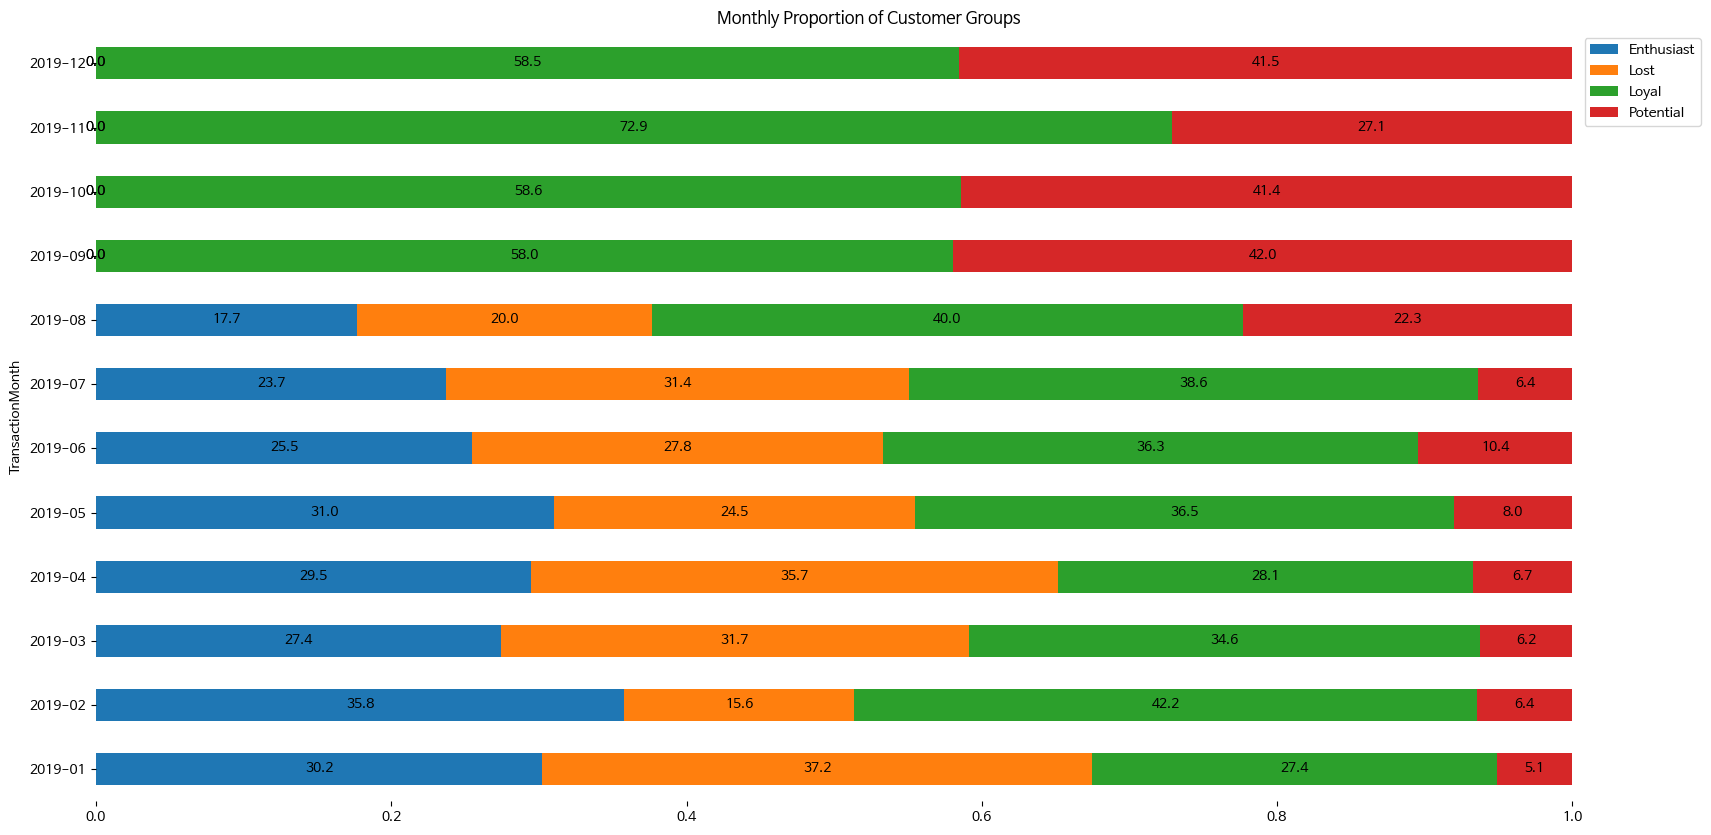

In [ ]:
# Visualize monthly changes in customer group proportions
import warnings
warnings.filterwarnings('ignore')
# plt.style.use(['dark_background'])

ax = df_level_pivot.plot(kind='barh', stacked=True, title="Monthly Proportion of Customer Groups ", rot=0);

# Add percentage labels on bars
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center', color='black');

# Remove box frame and adjust layout
plt.box(False)
plt.gcf().set_size_inches(20, 10)
plt.legend(loc='upper right', bbox_to_anchor=(1.04,1))
plt.show()

```
From January to August, all customer groups were actively represented.
During this period, the proportion of Potential customers gradually increased over time.
From September to December, the proportions of Loyal and Potential customers were relatively high.
This is likely because other segments had no transactions during these months, making these two groups account for the majority.
```

Loyal: High-value customers who spend a lot, visit frequently, and have made recent purchases

---
- The median annual purchase amount is around $5,000, with some customers spending over \$80,000.

- These customers have short purchase cycles, with most making transactions every 10 days or less.

- Compared to the overall gender distribution, the gender ratio among Loyal customers is slightly more balanced.

- No significant differences were observed in terms of preferred product categories, regions, or membership duration.

- The average delivery fee for Loyal customers is less than $10.

In [ ]:
# Load data for Cluster 1 (Loyal customers)
c1 = seg_df[seg_df['CustomerGroup'] == 'Loyal']

c1.head()

,CustomerID,TransactionID,TransactionDate,ProductID,ProductCategory,Quantity,UnitPrice,DeliveryFee,CouponApplied,Month,CouponCode,DiscountRate,GST,PurchaseAmount,Gender,Region,MonthsAsCustomer,YearsAsCustomerGroup,Recency,Frequency,Monetary,R,F,M,RFM_Score,CustomerGroup,TransactionMonth
9,USER_0190,Transaction_0003,2019-01-01,Product_0914,Office,52,0.98,6.50,Used,Jan,OFF10,10.00,0.10,50.45,Male,California,43,3–4 years,14,26,3032.81,4,4,3,11,Loyal,2019-01
10,USER_0190,Transaction_0003,2019-01-01,Product_0966,Office,31,1.99,6.50,Clicked,Jan,OFF10,10.00,0.10,67.86,Male,California,43,3–4 years,14,26,3032.81,4,4,3,11,Loyal,2019-01
11,USER_0190,Transaction_0003,2019-01-01,Product_0970,Office,31,1.99,6.50,Clicked,Jan,OFF10,10.00,0.10,67.86,Male,California,43,3–4 years,14,26,3032.81,4,4,3,11,Loyal,2019-01
12,USER_0190,Transaction_0003,2019-01-01,Product_1025,Apparel,5,17.53,6.50,Used,Jan,SALE10,10.00,0.18,93.08,Male,California,43,3–4 years,14,26,3032.81,4,4,3,11,Loyal,2019-01
13,USER_0190,Transaction_0004,2019-01-01,Product_0983,Nest-USA,2,122.77,6.50,Clicked,Jan,ELEC10,10.00,0.10,270.09,Male,California,43,3–4 years,14,26,3032.81,4,4,3,11,Loyal,2019-01


In [ ]:
# Check data info — no missing values found
c1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29874 entries, 9 to 52908
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            29874 non-null  object        
 1   TransactionID         29874 non-null  object        
 2   TransactionDate       29874 non-null  datetime64[ns]
 3   ProductID             29874 non-null  object        
 4   ProductCategory       29874 non-null  object        
 5   Quantity              29874 non-null  int64         
 6   UnitPrice             29874 non-null  float64       
 7   DeliveryFee           29874 non-null  float64       
 8   CouponApplied         29874 non-null  object        
 9   Month                 29874 non-null  object        
 10  CouponCode            29874 non-null  object        
 11  DiscountRate          29874 non-null  float64       
 12  GST                   29874 non-null  float64       
 13  PurchaseAmount  

In [ ]:
# Calculate total purchase amount for Loyal customers
pur_price = pd.DataFrame(c1.groupby('CustomerID')['PurchaseAmount'].sum().reset_index(name = 'TotalPurchaseAmount'))

pur_price

,CustomerID,TotalPurchaseAmount
0,USER_0001,15021.70
1,USER_0008,10473.22
2,USER_0009,5271.31
3,USER_0012,2217.09
4,USER_0015,2464.35
...,...,...
411,USER_1456,2636.13
412,USER_1459,6318.02
413,USER_1460,8081.79
414,USER_1464,2384.12


In [ ]:
pur_price.describe()

,TotalPurchaseAmount
count,416.00
mean,7094.30
std,8015.62
min,1800.06
25%,3161.71
50%,4827.51
75%,8084.84
max,82073.78


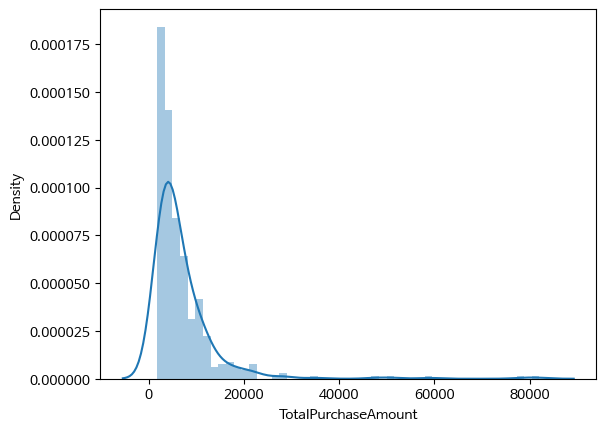

In [ ]:
# Visualize the distribution of total purchase amount
sns.distplot(pur_price['TotalPurchaseAmount']);

```
Among Loyal customers, there are individuals who spent over $80,000 in total over the year.
Considering the wide range between the minimum and maximum values,
we used the median rather than the mean to represent central tendency.
The median total purchase amount is approximately $5,000.
```

In [ ]:
## Create a dataframe for calculating transaction intervals

# Extract data needed to calculate transaction cycle
t_cycle = pd.DataFrame(c1.groupby('CustomerID').agg({'TransactionDate' : ['min', 'max'], 'TransactionID' : 'nunique'}))
t_cycle.columns = ['FirstTransactionDate', 'LastTransactionDate', 'TransactionCount']
t_cycle.reset_index(inplace = True)

# Filter customers with more than one transaction day and at least two transactions
t_cycle = t_cycle[(t_cycle['LastTransactionDate'] - t_cycle['FirstTransactionDate']).dt.days > 1]
t_cycle = t_cycle[t_cycle['TransactionCount'] >= 2]

# Calculate transaction interval
t_cycle['CustomerLifespan'] = (t_cycle['LastTransactionDate'] - t_cycle['FirstTransactionDate'])
t_cycle['TransactionInterval'] = t_cycle['CustomerLifespan'] / (t_cycle['TransactionCount'] - 1)
t_cycle['TransactionInterval'] = t_cycle['TransactionInterval'].dt.days

# Sort by interval and remove customers with zero-day lifespan
t_cycle.sort_values(by = 'TransactionInterval', inplace = True)
t_cycle = t_cycle[t_cycle['CustomerLifespan'] != '0 days']

t_cycle

,CustomerID,FirstTransactionDate,LastTransactionDate,TransactionCount,CustomerLifespan,TransactionInterval
168,USER_0535,2019-11-26,2019-12-01,21,5 days,0
178,USER_0572,2019-07-05,2019-10-02,114,89 days,0
172,USER_0546,2019-10-16,2019-11-14,42,29 days,0
171,USER_0544,2019-10-20,2019-10-23,22,3 days,0
186,USER_0586,2019-10-04,2019-10-14,18,10 days,0
...,...,...,...,...,...,...
96,USER_0312,2019-01-16,2019-12-14,15,332 days,23
41,USER_0127,2019-02-04,2019-12-24,15,323 days,23
67,USER_0216,2019-01-23,2019-10-17,12,267 days,24
344,USER_1237,2019-01-22,2019-12-22,14,334 days,25


In [ ]:
t_cycle.describe()

,TransactionCount,CustomerLifespan,TransactionInterval
count,304.00,304,304.00
mean,40.95,198 days 02:36:18.947368422,6.58
std,40.53,92 days 00:41:05.869757376,5.27
min,12.00,2 days 00:00:00,0.00
25%,20.00,140 days 12:00:00,3.00
50%,30.00,206 days 00:00:00,5.00
75%,45.00,268 days 00:00:00,9.00
max,328.00,358 days 00:00:00,29.00


```
Among Loyal customers, 304 individuals were included in the transaction interval analysis,
accounting for approximately 73% of the group.

Due to the high number of transactions within a relatively short timespan,
most customers have a transaction interval of less than 10 days,
indicating a relatively frequent purchase behavior.
```


In [ ]:
# Check the most frequently purchased product categories by Loyal customers
c1['ProductCategory'].value_counts()

,ProductCategory
Apparel,9777
Nest-USA,8205
Office,3487
Nest,1918
Drinkware,1852
Lifestyle,1677
Bags,1031
Headgear,415
Notebooks & Journals,359
Waze,315


```
The product category preferences of Loyal customers do not significantly differ from the overall purchase trends.
```

In [ ]:
# Identify the top 20 most frequently purchased products by Loyal customers
product = pd.DataFrame(c1.groupby('CustomerID')['ProductID'].value_counts().reset_index(name = 'PurchaseCount'))
product.sort_values('PurchaseCount', ascending = False, inplace = True)
product.head(20)

,CustomerID,ProductID,PurchaseCount
9109,USER_0643,Product_0981,47
1750,USER_0118,Product_0981,46
1751,USER_0118,Product_0976,42
10486,USER_0736,Product_0981,41
1752,USER_0118,Product_0983,40
7736,USER_0563,Product_0981,40
10487,USER_0736,Product_0976,36
17422,USER_1355,Product_0981,35
9110,USER_0643,Product_0983,34
7737,USER_0563,Product_0983,33


In [ ]:
# Display the top 11 most frequently purchased products among Loyal customers
p = pd.DataFrame(product['ProductID'].value_counts())
p.rename(columns = {'ProductID' : 'PurchaseCount'}, inplace = True)
p.head(11)

,PurchaseCount
Product_0981,393
Product_0976,389
Product_0983,378
Product_0984,308
Product_0989,302
Product_0985,290
Product_0992,256
Product_0990,255
Product_0904,250
Product_0994,206


In [ ]:
# Check gender distribution among Loyal customers
cs_gp = pd.DataFrame(c1.groupby('Gender')['CustomerID'].nunique().reset_index(name = 'CustomerCount'))
cs_gp

,Gender,CustomerCount
0,Female,249
1,Male,167


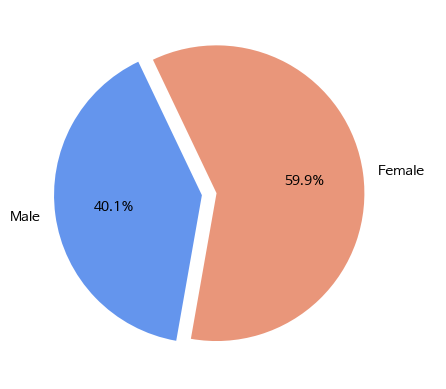

In [ ]:
# Visualize gender distribution
import matplotlib.pyplot as plt

ratio = [167/416, 249/416]
labels = ['Male', 'Female	']
explode = [0.05, 0.05]
colors = ['#6495ED', '#E9967A']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, colors=colors)
plt.show()

```
Among Loyal customers, the proportion of women is higher than men.
However, when compared to the overall customer ratio (63.6% women and 36.4% men),
the male proportion in the Loyal group is not low.
```

In [ ]:
# Identify the number of Loyal customers in each region
lo_gp = pd.DataFrame(c1.groupby('Region')['CustomerID'].nunique().reset_index(name = 'CustomerCount'))
lo_gp.sort_values(by = 'CustomerCount', ascending = False, inplace = True)
lo_gp

,Region,CustomerCount
1,Chicago,145
0,California,116
3,New York,93
2,New Jersey,39
4,Washington DC,23


```
There is no significant difference compared to the overall customer distribution by region.
```

In [ ]:
# Check customer count by membership duration
du_gp = pd.DataFrame(c1.groupby('YearsAsCustomerGroup')['CustomerID'].nunique().reset_index(name = 'CustomerCount'))
du_gp

,YearsAsCustomerGroup,CustomerCount
0,1–2 years,105
1,2–3 years,103
2,3–4 years,103
3,Over 4 years,14
4,≤1 year,91


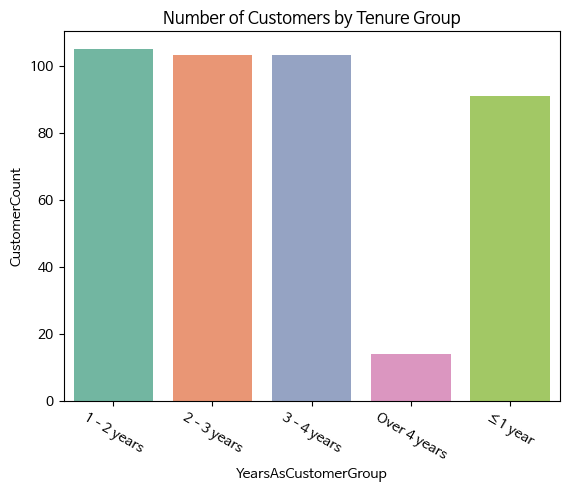

In [ ]:
ax = sns.barplot(du_gp, x = 'YearsAsCustomerGroup', y = 'CustomerCount', hue = 'YearsAsCustomerGroup', palette = 'Set2')
ax.set_title("Number of Customers by Tenure Group")
plt.xticks(rotation = -30);

```
The distribution is relatively even across groups, except for the 'Over 4 years' group.
```

In [ ]:
# Check coupon usage status
cp_gp = pd.DataFrame(c1.groupby('CouponApplied')['CustomerID'].nunique().reset_index(name = 'CustomerCount'))
cp_gp

,CouponApplied,CustomerCount
0,Clicked,416
1,Not Used,414
2,Used,416


```
Coupon usage didn't show a significant difference, and customers seemed to purchase frequently regardless of it.
```

In [ ]:
### Average Delivery Fee of Loyal Customers

# Calculate average delivery fee per transaction
cost_gp = pd.DataFrame(c1.groupby(['CustomerID', 'TransactionID'])['DeliveryFee'].mean().reset_index(name = 'DeliveryFee'))

# Calculate average delivery fee per customer
deli_cost = pd.DataFrame(cost_gp.groupby('CustomerID')['DeliveryFee'].mean().reset_index(name = 'AverageDeliveryFee'))
deli_cost

,CustomerID,AverageDeliveryFee
0,USER_0001,9.24
1,USER_0008,9.04
2,USER_0009,7.71
3,USER_0012,9.72
4,USER_0015,9.40
...,...,...
411,USER_1456,6.31
412,USER_1459,11.59
413,USER_1460,6.18
414,USER_1464,11.69


In [ ]:
deli_cost.describe()

,AverageDeliveryFee
count,416.00
mean,8.59
std,2.27
min,5.57
25%,7.16
50%,7.99
75%,9.32
max,22.22


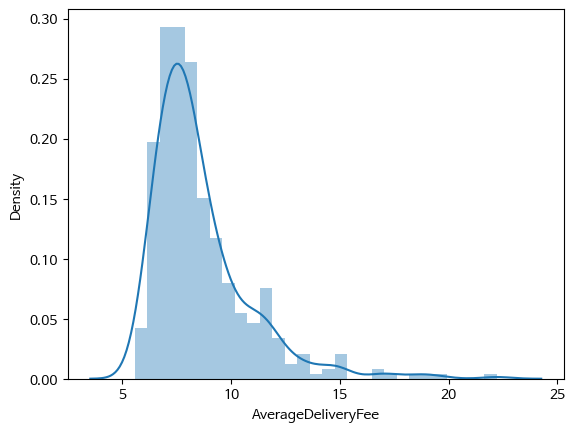

In [ ]:
# Distribution of Average Delivery Fee per Customer
import seaborn as sns

sns.distplot(deli_cost['AverageDeliveryFee']);

```
The majority of loyal customers tend to incur an average delivery fee of less than $10.
```

Lost: At-Risk Customers  
(Customers with low purchase amounts and frequency who haven’t visited recently)

---
- Many had very few transactions during the year, and in many cases, they didn’t make any additional purchases after their first visit.

- The gender ratio is similar to that of the overall customer base.

- Customers with less than one year of membership accounted for 22%, which is a significant proportion.

- There were slightly more customers who clicked on coupons but did not use them compared to those who actually used them.

- Although the difference in average delivery fees was not large, some customers showed higher delivery costs compared to loyal customers.

In [ ]:
# Load data for Lost Customers
c0 = seg_df[seg_df['CustomerGroup'] == 'Lost']

c0.head()

,CustomerID,TransactionID,TransactionDate,ProductID,ProductCategory,Quantity,UnitPrice,DeliveryFee,CouponApplied,Month,CouponCode,DiscountRate,GST,PurchaseAmount,Gender,Region,MonthsAsCustomer,YearsAsCustomerGroup,Recency,Frequency,Monetary,R,F,M,RFM_Score,CustomerGroup,TransactionMonth
46,USER_0345,Transaction_0013,2019-01-01,Product_0971,Lifestyle,1,1.24,6.50,Clicked,Jan,EXTRA10,10.00,0.18,1.46,Female,California,30,2–3 years,365,1,1.46,1,1,1,3,Lost,2019-01
105,USER_1347,Transaction_0050,2019-01-02,Product_0951,Office,1,3.08,6.50,Clicked,Jan,OFF10,10.00,0.10,3.39,Female,New Jersey,24,1–2 years,331,3,837.34,1,1,2,4,Lost,2019-01
142,USER_0922,Transaction_0072,2019-01-02,Product_0777,Apparel,1,31.35,6.50,Clicked,Jan,SALE10,10.00,0.18,36.99,Male,Chicago,49,Over 4 years,364,5,910.13,1,1,2,4,Lost,2019-01
143,USER_0922,Transaction_0072,2019-01-02,Product_0778,Apparel,1,19.80,6.50,Not Used,Jan,SALE10,10.00,0.18,23.36,Male,Chicago,49,Over 4 years,364,5,910.13,1,1,2,4,Lost,2019-01
144,USER_0922,Transaction_0072,2019-01-02,Product_0781,Apparel,1,19.80,6.50,Clicked,Jan,SALE10,10.00,0.18,23.36,Male,Chicago,49,Over 4 years,364,5,910.13,1,1,2,4,Lost,2019-01


In [ ]:
# Calculate total purchase amount for Lost customers
pur_price = pd.DataFrame(c0.groupby('CustomerID')['PurchaseAmount'].sum().reset_index(name = 'TotalPurchaseAmount'))

pur_price

,CustomerID,TotalPurchaseAmount
0,USER_0010,579.40
1,USER_0022,742.86
2,USER_0023,1420.56
3,USER_0027,32.78
4,USER_0029,1570.66
...,...,...
419,USER_1454,92.06
420,USER_1457,131.02
421,USER_1462,58.35
422,USER_1463,582.36


In [ ]:
pur_price.describe()

,TotalPurchaseAmount
count,424.00
mean,651.37
std,521.59
min,1.32
25%,185.47
50%,563.36
75%,1010.79
max,2296.05


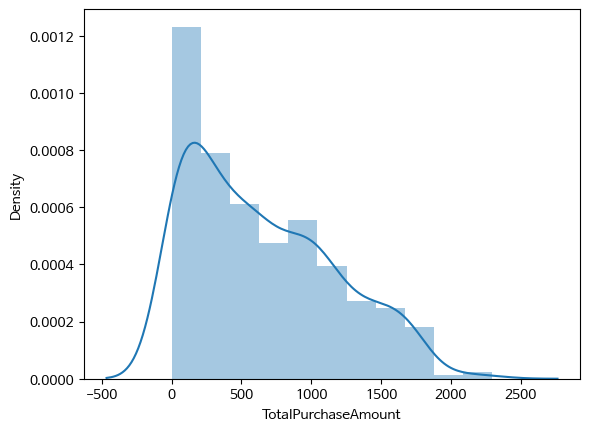

In [ ]:
# Visualize the distribution of total purchase amount
sns.distplot(pur_price['TotalPurchaseAmount']);

```
The maximum total purchase amount among lost customers is approximately $2,300,
which is significantly lower than the median total purchase amount of loyal customers (around $5,000).
```

In [ ]:
## Create a dataframe for calculating transaction intervals

# Extract data needed to calculate transaction cycle
t_cycle0 = pd.DataFrame(c0.groupby('CustomerID').agg({'TransactionDate' : ['min', 'max'], 'TransactionID' : 'nunique'}))
t_cycle0.columns = ['FirstTransactionDate', 'LastTransactionDate', 'TransactionCount']
t_cycle0.reset_index(inplace = True)

# Filter customers with more than one transaction day and at least two transactions
t_cycle0 = t_cycle0[(t_cycle0['LastTransactionDate'] - t_cycle0['FirstTransactionDate']).dt.days > 1]
t_cycle0 = t_cycle0[t_cycle0['TransactionCount'] >= 2]

# Calculate transaction interval
t_cycle0['CustomerLifespan'] = (t_cycle0['LastTransactionDate'] - t_cycle0['FirstTransactionDate'])
t_cycle0['TransactionInterval'] = t_cycle0['CustomerLifespan'] / (t_cycle0['TransactionCount'] - 1)
t_cycle0['TransactionInterval'] = t_cycle0['TransactionInterval'].dt.days

# Sort by interval and remove customers with zero-day lifespan
t_cycle0.sort_values(by = 'TransactionInterval', inplace = True)
t_cycle0 = t_cycle0[t_cycle0['CustomerLifespan'] != '0 days']

t_cycle0.head()

,CustomerID,FirstTransactionDate,LastTransactionDate,TransactionCount,CustomerLifespan,TransactionInterval
414,USER_1427,2019-07-10,2019-07-16,11,6 days,0
402,USER_1386,2019-05-10,2019-05-18,11,8 days,0
292,USER_1016,2019-01-20,2019-01-29,11,9 days,0
88,USER_0296,2019-06-03,2019-06-21,11,18 days,1
157,USER_0571,2019-06-22,2019-07-12,10,20 days,2


In [ ]:
t_cycle0.describe()

,TransactionCount,CustomerLifespan,TransactionInterval
count,76.00,76,76.00
mean,6.13,91 days 03:09:28.421052632,28.26
std,2.85,59 days 04:27:01.637527504,31.85
min,2.00,4 days 00:00:00,0.00
25%,4.00,45 days 06:00:00,8.00
50%,6.00,78 days 00:00:00,19.00
75%,8.00,132 days 18:00:00,33.25
max,11.00,209 days 00:00:00,172.00


```
Compared to loyal customers, the average and median transaction intervals are relatively high,
and only about 17% of lost customers were eligible for transaction interval analysis.
It seems that many of them made a purchase only on their first visit and did not return to buy again.
```

In [ ]:
# Check the most frequently purchased product categories by Lost customers
c0['ProductCategory'].value_counts()

,ProductCategory
Apparel,1663
Nest-USA,876
Office,599
Drinkware,311
Lifestyle,251
Bags,148
Notebooks & Journals,74
Headgear,65
Waze,36
Bottles,26


```
The most frequently purchased product categories are quite similar to those of loyal customers.
```

In [ ]:
# Identify the top 20 most frequently purchased products by Lost customers
product0 = pd.DataFrame(c0.groupby('CustomerID')['ProductID'].value_counts().reset_index(name = 'PurchaseCount'))
product0.sort_values('PurchaseCount', ascending = False, inplace = True)
product0.head(20)

,CustomerID,ProductID,PurchaseCount
2508,USER_0928,Product_0976,4
2571,USER_0944,Product_0981,4
548,USER_0246,Product_0983,4
2808,USER_1037,Product_0981,4
458,USER_0221,Product_0981,4
2462,USER_0920,Product_0983,4
2733,USER_1016,Product_0981,4
2509,USER_0928,Product_0981,4
2048,USER_0769,Product_0981,3
207,USER_0122,Product_0983,3


In [ ]:
# Display the top 11 most frequently purchased products among Lost customers
p0 = pd.DataFrame(product0['ProductID'].value_counts())
p0.rename(columns = {'ProductID' : 'PurchaseCount'}, inplace = True)
p0.head(11)

,PurchaseCount
Product_0983,163
Product_0981,162
Product_0976,160
Product_0984,72
Product_0904,61
Product_0985,57
Product_0880,48
Product_0892,40
Product_0915,38
Product_1134,30


```
Four of the top 11 products appeared in a different order than in the loyal customer group.
```

In [ ]:
# Check gender distribution among Lost customers
cs_gp = pd.DataFrame(c0.groupby('Gender')['CustomerID'].nunique().reset_index(name = 'CustomerCount'))
cs_gp

,Gender,CustomerCount
0,Female,275
1,Male,149


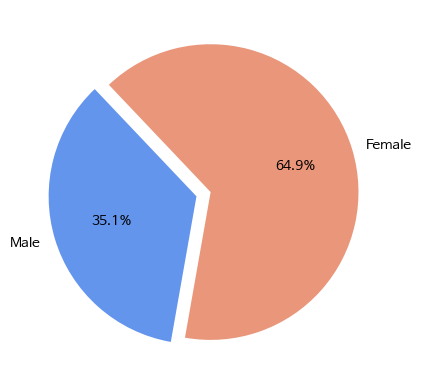

In [ ]:
# Visualize gender distribution
import matplotlib.pyplot as plt

ratio = [149/424, 275/424]
labels = ['Male', 'Female']
explode = [0.05, 0.05]
colors = ['#6495ED', '#E9967A']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, colors=colors)
plt.show()

```
The proportion of female customers was approximately 1.8 times higher than that of male customers.
```

In [ ]:
# Identify the number of Lost customers in each region
lo_gp = pd.DataFrame(c0.groupby('Region')['CustomerID'].nunique().reset_index(name = 'CustomerCount'))
lo_gp.sort_values(by = 'CustomerCount', ascending = False, inplace = True)
lo_gp

,Region,CustomerCount
0,California,133
1,Chicago,133
3,New York,106
2,New Jersey,37
4,Washington DC,15


```
There is no significant difference compared to the overall customer distribution by region.
```

In [ ]:
# Check customer count by membership duration
du_gp = pd.DataFrame(c0.groupby('YearsAsCustomerGroup')['CustomerID'].nunique().reset_index(name = 'CustomerCount'))
du_gp

,YearsAsCustomerGroup,CustomerCount
0,1–2 years,107
1,2–3 years,109
2,3–4 years,99
3,Over 4 years,15
4,≤1 year,94


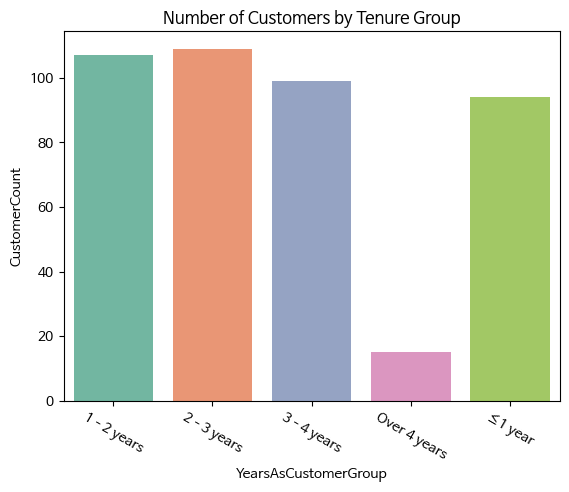

In [ ]:
# Visualization
ax = sns.barplot(du_gp, x = 'YearsAsCustomerGroup', y = 'CustomerCount', hue = 'YearsAsCustomerGroup', palette = 'Set2')
ax.set_title("Number of Customers by Tenure Group")
plt.xticks(rotation = -30);

```
While the proportion is similar to that of loyal customers,
a relatively large portion—about 22%—of at-risk customers have been subscribed for one year or less.
```

In [ ]:
# Check coupon usage status
cp_gp = pd.DataFrame(c0.groupby('CouponApplied')['CustomerID'].nunique().reset_index(name = 'CustomerCount'))
cp_gp

,CouponApplied,CustomerCount
0,Clicked,396
1,Not Used,288
2,Used,360


```
Unlike loyal customers, at-risk customers were more likely to click coupons without using them.
Fewer of them used coupons compared to those who didn't use any.
```

In [ ]:
# Calculate average delivery fee per transaction
cost_gp = pd.DataFrame(c0.groupby(['CustomerID', 'TransactionID'])['DeliveryFee'].mean().reset_index(name = 'DeliveryFee'))

# Calculate average delivery fee per customer
deli_cost = pd.DataFrame(cost_gp.groupby('CustomerID')['DeliveryFee'].mean().reset_index(name = 'AverageDeliveryFee'))
deli_cost

,CustomerID,AverageDeliveryFee
0,USER_0010,7.88
1,USER_0022,11.47
2,USER_0023,14.02
3,USER_0027,6.00
4,USER_0029,7.56
...,...,...
419,USER_1454,9.49
420,USER_1457,6.00
421,USER_1462,6.25
422,USER_1463,31.45


In [ ]:
deli_cost.describe()

,AverageDeliveryFee
count,424.00
mean,10.67
std,17.48
min,5.00
25%,6.17
50%,6.79
75%,10.43
max,323.47


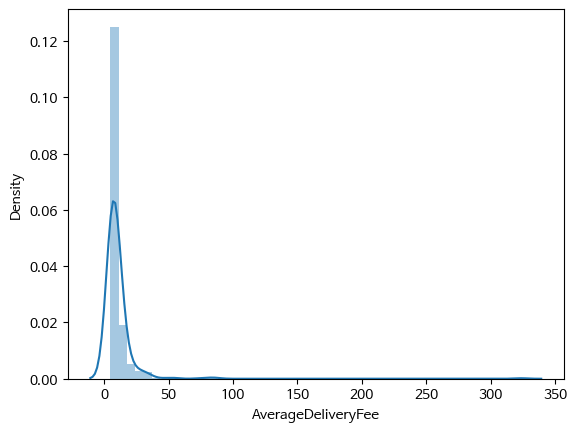

In [ ]:
# Distribution of Average Delivery Fee per Customer
import seaborn as sns

sns.distplot(deli_cost['AverageDeliveryFee']);

```
Some customers paid over $300 in average delivery fees.
Although the median fee is lower than that of loyal customers,
the difference in delivery cost isn't proportional to their lower purchase amount.
```

Potential: Customers who visited recently but made fewer purchases or spent less.

---    

- They have a higher median purchase amount than at-risk customers, and most of them made a purchase within a month.
- Their average delivery fee is similar to that of loyal customers, and the maximum fee is lower than that of at-risk customers.

In [ ]:
# Load data for Cluster 2 (Potential customers)
c2 = seg_df[seg_df['CustomerGroup'] == 'Potential']

c2.head()

,CustomerID,TransactionID,TransactionDate,ProductID,ProductCategory,Quantity,UnitPrice,DeliveryFee,CouponApplied,Month,CouponCode,DiscountRate,GST,PurchaseAmount,Gender,Region,MonthsAsCustomer,YearsAsCustomerGroup,Recency,Frequency,Monetary,R,F,M,RFM_Score,CustomerGroup,TransactionMonth
65,USER_0683,Transaction_0023,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Clicked,Jan,ELEC10,10.00,0.10,169.08,Male,California,49,Over 4 years,124,6,903.36,3,2,2,7,Potential,2019-01
82,USER_0730,Transaction_0035,2019-01-01,Product_0416,Apparel,1,15.67,6.50,Used,Jan,SALE10,10.00,0.18,16.64,Male,California,32,2–3 years,79,13,987.99,3,3,2,8,Potential,2019-01
83,USER_0730,Transaction_0035,2019-01-01,Product_0638,Apparel,1,61.89,6.50,Clicked,Jan,SALE10,10.00,0.18,73.03,Male,California,32,2–3 years,79,13,987.99,3,3,2,8,Potential,2019-01
1331,USER_1438,Transaction_0692,2019-01-10,Product_0976,Nest-USA,1,122.77,6.50,Clicked,Jan,ELEC10,10.00,0.10,135.05,Female,California,26,2–3 years,72,5,613.45,3,1,1,5,Potential,2019-01
1332,USER_1438,Transaction_0693,2019-01-10,Product_0981,Nest-USA,1,153.71,6.50,Not Used,Jan,ELEC10,10.00,0.10,169.08,Female,California,26,2–3 years,72,5,613.45,3,1,1,5,Potential,2019-01


In [ ]:
# Calculate total purchase amount for Potential customers
pur_price = pd.DataFrame(c2.groupby('CustomerID')['PurchaseAmount'].sum().reset_index(name = 'TotalPurchaseAmount'))

pur_price

,CustomerID,TotalPurchaseAmount
0,USER_0000,24.98
1,USER_0002,1492.41
2,USER_0003,1339.56
3,USER_0004,1369.94
4,USER_0005,688.03
...,...,...
320,USER_1447,437.14
321,USER_1455,1010.88
322,USER_1458,76.62
323,USER_1461,2255.81


In [ ]:
# Check descriptive statistics of total purchase amount
pur_price.describe()

,TotalPurchaseAmount
count,325.00
mean,1008.65
std,734.66
min,0.99
25%,432.67
50%,922.60
75%,1465.82
max,3525.36


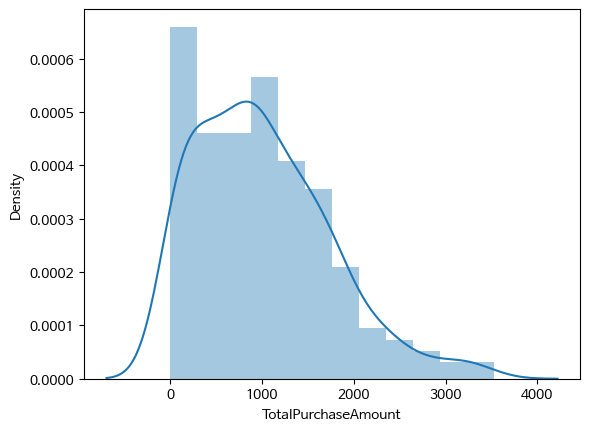

In [ ]:
# Visualize the distribution of total purchase amount
sns.distplot(pur_price['TotalPurchaseAmount']);

```
Compared to at-risk customers, the median total purchase amount is about 1.6 times higher, with a wider distribution range.
```

In [ ]:
## Create a dataframe for calculating transaction intervals

# Extract data needed to calculate transaction cycle
t_cycle2 = pd.DataFrame(c2.groupby('CustomerID').agg({'TransactionDate' : ['min', 'max'], 'TransactionID' : 'nunique'}))
t_cycle2.columns = ['FirstTransactionDate', 'LastTransactionDate', 'TransactionCount']
t_cycle2.reset_index(inplace = True)

# Filter customers with more than one transaction day and at least two transactions
t_cycle2 = t_cycle2[(t_cycle2['LastTransactionDate'] - t_cycle2['FirstTransactionDate']).dt.days > 1]
t_cycle2 = t_cycle2[t_cycle2['TransactionCount'] >= 2]

# Calculate transaction interval
t_cycle2['CustomerLifespan'] = (t_cycle2['LastTransactionDate'] - t_cycle2['FirstTransactionDate'])
t_cycle2['TransactionInterval'] = t_cycle2['CustomerLifespan'] / (t_cycle2['TransactionCount'] - 1)
t_cycle2['TransactionInterval'] = t_cycle2['TransactionInterval'].dt.days

# Sort by interval and remove customers with zero-day lifespan
t_cycle2.sort_values(by = 'TransactionInterval', inplace = True)
t_cycle2 = t_cycle2[t_cycle2['CustomerLifespan'] != '0 days']

t_cycle2.head()

,CustomerID,FirstTransactionDate,LastTransactionDate,TransactionCount,CustomerLifespan,TransactionInterval
123,USER_0491,2019-10-26,2019-11-03,12,8 days,0
187,USER_0764,2019-09-28,2019-09-30,4,2 days,0
99,USER_0390,2019-12-06,2019-12-12,10,6 days,0
216,USER_0927,2019-11-02,2019-11-14,8,12 days,1
35,USER_0125,2019-12-08,2019-12-18,7,10 days,1


In [ ]:
t_cycle2.describe()

,TransactionCount,CustomerLifespan,TransactionInterval
count,113.00,113,113.00
mean,8.24,137 days 18:03:11.150442478,24.89
std,3.59,92 days 06:36:47.618786670,28.68
min,2.00,2 days 00:00:00,0.00
25%,6.00,47 days 00:00:00,7.00
50%,8.00,132 days 00:00:00,19.00
75%,11.00,195 days 00:00:00,30.00
max,19.00,332 days 00:00:00,167.00


```
About 34% of potential customers were eligible for transaction interval analysis,
a higher proportion than that of at-risk customers.
Among those analyzed, most returned and made a purchase within a month.
```

In [ ]:
# Display the top 11 most frequently purchased products among Potential customers
product2 = pd.DataFrame(c2.groupby('CustomerID')['ProductID'].value_counts().reset_index(name = 'PurchaseCount'))
product2.sort_values('PurchaseCount', ascending = False, inplace = True)
p2 = pd.DataFrame(product2['ProductID'].value_counts())
p2.rename(columns = {'ProductID' : 'PurchaseCount'}, inplace = True)
p2.head(11)

,PurchaseCount
Product_0981,130
Product_0983,130
Product_0976,129
Product_0989,88
Product_0992,81
Product_0984,76
Product_0904,62
Product_0990,60
Product_0922,58
Product_0985,56


```
Product preferences among potential customers are quite similar to those of loyal customers.
```

In [ ]:
# Check gender distribution among Loyal customers
cs_gp = pd.DataFrame(c2.groupby('Gender')['CustomerID'].nunique().reset_index(name = 'CustomerCount'))
cs_gp

,Gender,CustomerCount
0,Female,219
1,Male,106


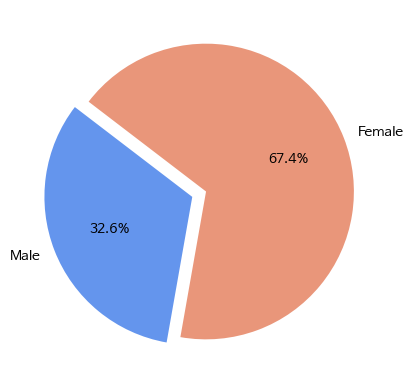

In [ ]:
# Visualize gender distribution
import matplotlib.pyplot as plt

ratio = [106/325, 219/325]
labels = ['Male', 'Female']
explode = [0.05, 0.05]
colors = ['#6495ED', '#E9967A']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, colors=colors)
plt.show()

```
There were more than twice as many female customers as male customers.
```

In [ ]:
# Check customer count by membership duration
du_gp = pd.DataFrame(c2.groupby('YearsAsCustomerGroup')['CustomerID'].nunique().reset_index(name = 'CustomerCount'))
du_gp

,YearsAsCustomerGroup,CustomerCount
0,1–2 years,82
1,2–3 years,81
2,3–4 years,76
3,Over 4 years,13
4,≤1 year,73


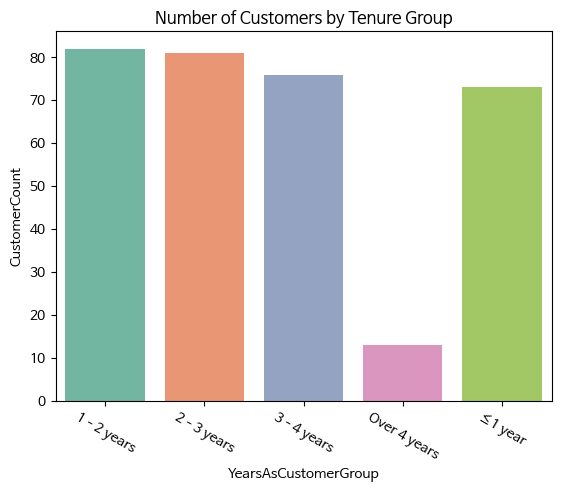

In [ ]:
# Visualization
ax = sns.barplot(du_gp, x = 'YearsAsCustomerGroup', y = 'CustomerCount', hue = 'YearsAsCustomerGroup', palette = 'Set2')
ax.set_title("Number of Customers by Tenure Group")
plt.xticks(rotation = -30);

```
Similar to other groups, the distribution of membership duration shows no major difference.
```

In [ ]:
# Check coupon usage status
cp_gp = pd.DataFrame(c2.groupby('CouponApplied')['CustomerID'].nunique().reset_index(name = 'CustomerCount'))
cp_gp

,CouponApplied,CustomerCount
0,Clicked,307
1,Not Used,245
2,Used,295


```
Potential customers also showed slightly more cases of clicking coupons without using them compared to actual usage.
```

In [ ]:
# Calculate average delivery fee per transaction
cost_gp = pd.DataFrame(c2.groupby(['CustomerID', 'TransactionID'])['DeliveryFee'].mean().reset_index(name = 'DeliveryFee'))

# Calculate average delivery fee per customer
deli_cost = pd.DataFrame(cost_gp.groupby('CustomerID')['DeliveryFee'].mean().reset_index(name = 'AverageDeliveryFee'))
deli_cost

,CustomerID,AverageDeliveryFee
0,USER_0000,75.00
1,USER_0002,10.13
2,USER_0003,7.49
3,USER_0004,11.88
4,USER_0005,6.00
...,...,...
320,USER_1447,8.33
321,USER_1455,9.46
322,USER_1458,6.00
323,USER_1461,9.10


In [ ]:
deli_cost.describe()

,AverageDeliveryFee
count,325.00
mean,9.14
std,10.84
min,4.80
25%,6.00
50%,6.73
75%,8.80
max,168.50


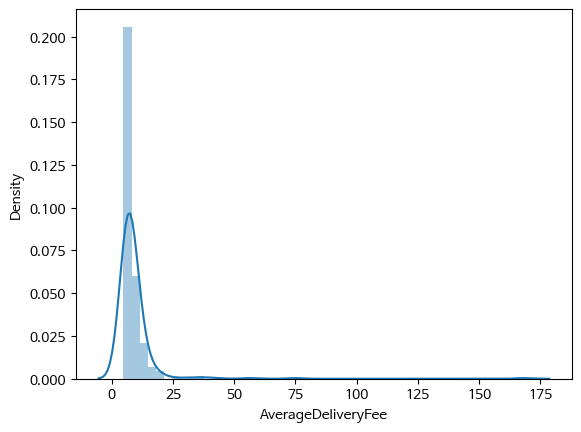

In [ ]:
# Distribution of Average Delivery Fee per Customer
import seaborn as sns

sns.distplot(deli_cost['AverageDeliveryFee']);

```
Although some customers have an average delivery fee exceeding $100, it is still lower than that of at-risk customers.
Most customers appear to pay less than $10, similar to loyal customers.

```

Enthusiast: Dormant but potentially valuable customers  
(They have relatively high purchase amounts but lower frequency than loyal customers, and haven't purchased recently.)

---

- They show a **higher total purchase amount** than other segments, except for loyal customers.
- Although their **transaction intervals are shorter** than those of loyal customers, the **proportion eligible for interval analysis** is lower.
- A slightly **higher proportion have been members for over 3 to 4 years**.
- There is **no significant difference in average delivery fees**.

In [ ]:
# Load data for Cluster 3 (Enthusiast customers)
c3 = seg_df[seg_df['CustomerGroup'] == 'Enthusiast']

c3.head()

,CustomerID,TransactionID,TransactionDate,ProductID,ProductCategory,Quantity,UnitPrice,DeliveryFee,CouponApplied,Month,CouponCode,DiscountRate,GST,PurchaseAmount,Gender,Region,MonthsAsCustomer,YearsAsCustomerGroup,Recency,Frequency,Monetary,R,F,M,RFM_Score,CustomerGroup,TransactionMonth
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,10.00,0.10,152.17,Male,Chicago,12,≤1 year,340,177,37377.52,1,4,4,9,Enthusiast,2019-01
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,10.00,0.10,152.17,Male,Chicago,12,≤1 year,340,177,37377.52,1,4,4,9,Enthusiast,2019-01
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,Jan,OFF10,10.00,0.10,2.03,Male,Chicago,12,≤1 year,340,177,37377.52,1,4,4,9,Enthusiast,2019-01
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,Jan,SALE10,10.00,0.18,103.43,Male,Chicago,12,≤1 year,340,177,37377.52,1,4,4,9,Enthusiast,2019-01
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,Jan,AIO10,10.00,0.18,17.52,Male,Chicago,12,≤1 year,340,177,37377.52,1,4,4,9,Enthusiast,2019-01


In [ ]:
# Calculate total purchase amount for Enthusiast customers
pur_price = pd.DataFrame(c3.groupby('CustomerID')['PurchaseAmount'].sum().reset_index(name = 'TotalPurchaseAmount'))

pur_price

,CustomerID,TotalPurchaseAmount
0,USER_0006,7366.30
1,USER_0013,1463.40
2,USER_0018,2935.77
3,USER_0024,2421.17
4,USER_0026,15042.39
...,...,...
298,USER_1434,1778.36
299,USER_1440,3393.15
300,USER_1442,4078.21
301,USER_1444,2769.62


In [ ]:
pur_price.describe()

,TotalPurchaseAmount
count,303.00
mean,4242.59
std,3313.86
min,842.04
25%,2203.85
50%,3384.20
75%,5474.17
max,37377.52


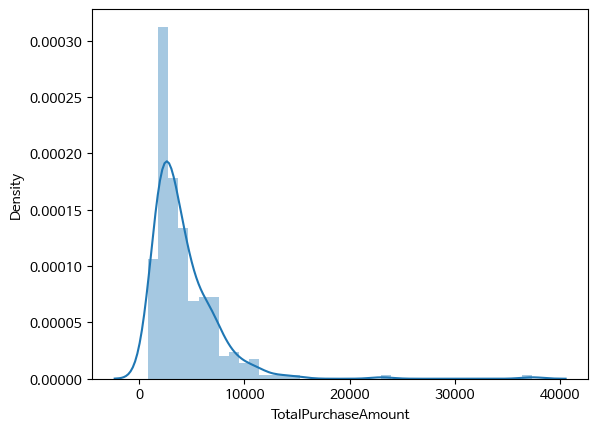

In [ ]:
# Visualize the distribution of total purchase amount
sns.distplot(pur_price['TotalPurchaseAmount']);

```
While the average and median purchase amounts are lower than loyal customers,  
Enthusiasts still show stronger purchasing behavior than at-risk and potential groups, with some spending over $30,000.
```

In [ ]:
## Create a dataframe for calculating transaction intervals

# Extract data needed to calculate transaction cycle
t_cycle3 = pd.DataFrame(c3.groupby('CustomerID').agg({'TransactionDate' : ['min', 'max'], 'TransactionID' : 'nunique'}))
t_cycle3.columns = ['FirstTransactionDate', 'LastTransactionDate', 'TransactionCount']
t_cycle3.reset_index(inplace = True)

# Filter customers with more than one transaction day and at least two transactions
t_cycle3 = t_cycle3[(t_cycle3['LastTransactionDate'] - t_cycle3['FirstTransactionDate']).dt.days > 1]
t_cycle3 = t_cycle3[t_cycle3['TransactionCount'] >= 2]

# Calculate transaction interval
t_cycle3['CustomerLifespan'] = (t_cycle3['LastTransactionDate'] - t_cycle3['FirstTransactionDate'])
t_cycle3['TransactionInterval'] = t_cycle3['CustomerLifespan'] / (t_cycle3['TransactionCount'] - 1)
t_cycle3['TransactionInterval'] = t_cycle3['TransactionInterval'].dt.days

# Sort by interval and remove customers with zero-day lifespan
t_cycle3.sort_values(by = 'TransactionInterval', inplace = True)
t_cycle3 = t_cycle3[t_cycle3['CustomerLifespan'] != '0 days']

t_cycle3.head()

,CustomerID,FirstTransactionDate,LastTransactionDate,TransactionCount,CustomerLifespan,TransactionInterval
0,USER_0006,2019-05-26,2019-06-25,44,30 days,0
132,USER_0784,2019-04-30,2019-05-25,52,25 days,0
50,USER_0332,2019-07-18,2019-08-02,44,15 days,0
277,USER_1358,2019-01-01,2019-01-26,177,25 days,0
121,USER_0746,2019-02-11,2019-02-14,24,3 days,0


In [ ]:
t_cycle3.describe()

,TransactionCount,CustomerLifespan,TransactionInterval
count,124.00,124,124.00
mean,27.76,93 days 21:52:15.483870968,4.61
std,20.97,57 days 17:47:33.939952322,4.25
min,5.00,2 days 00:00:00,0.00
25%,14.00,54 days 12:00:00,1.00
50%,22.00,86 days 12:00:00,4.00
75%,34.25,137 days 06:00:00,6.00
max,177.00,225 days 00:00:00,19.00


```
Out of 303 customers, 124 (about 40%) were included in the transaction interval analysis.
Their average transaction interval is approximately 2 days shorter than that of loyal customers,
and most of them have intervals shorter than 6 days, indicating a more frequent purchase pattern than loyal customers.

```

In [ ]:
# Display the top 11 most frequently purchased products among Enthusiast customers
product3 = pd.DataFrame(c3.groupby('CustomerID')['ProductID'].value_counts().reset_index(name = 'PurchaseCount'))
product3.sort_values('PurchaseCount', ascending = False, inplace = True)
p3 = pd.DataFrame(product3['ProductID'].value_counts())
p3.rename(columns = {'ProductID' : 'PurchaseCount'}, inplace = True)
p3.head(11)

,PurchaseCount
Product_0983,279
Product_0976,275
Product_0981,267
Product_0984,186
Product_0985,164
Product_0904,136
Product_0989,123
Product_0915,108
Product_0880,94
Product_0922,85


```
Not much difference from loyal customers.
```

In [ ]:
# Check gender distribution among Enthusiast customers
cs_gp = pd.DataFrame(c3.groupby('Gender')['CustomerID'].nunique().reset_index(name = 'CustomerCount'))
cs_gp

,Gender,CustomerCount
0,Female,191
1,Male,112


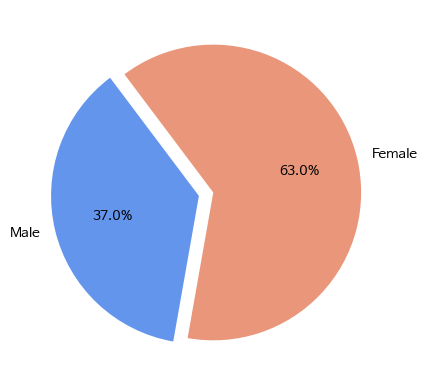

In [ ]:
# Visualize gender distribution
import matplotlib.pyplot as plt

ratio = [112/303, 191/303]
labels = ['Male', 'Female']
explode = [0.05, 0.05]
colors = ['#6495ED', '#E9967A']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, colors=colors)
plt.show()

```
There is no significant difference compared to the overall gender distribution.
```

In [ ]:
# Check customer count by membership duration
du_gp = pd.DataFrame(c3.groupby('YearsAsCustomerGroup')['CustomerID'].nunique().reset_index(name = 'CustomerCount'))
du_gp

,YearsAsCustomerGroup,CustomerCount
0,1–2 years,67
1,2–3 years,73
2,3–4 years,82
3,Over 4 years,12
4,≤1 year,69


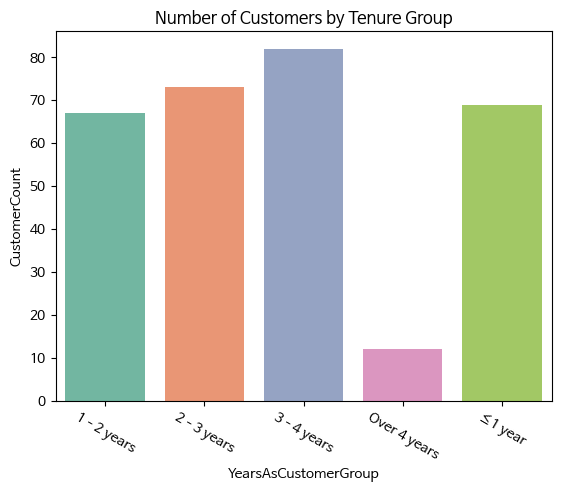

In [ ]:
ax = sns.barplot(du_gp, x = 'YearsAsCustomerGroup', y = 'CustomerCount', hue = 'YearsAsCustomerGroup', palette = 'Set2')
ax.set_title("Number of Customers by Tenure Group")
plt.xticks(rotation = -30);

```
This group shows a slightly higher proportion of customers with 3–4 years of tenure,
and fewer with less than 2 years, compared to other groups.
```

In [ ]:
# Check coupon usage status
cp_gp = pd.DataFrame(c3.groupby('CouponApplied')['CustomerID'].nunique().reset_index(name = 'CustomerCount'))
cp_gp

,CouponApplied,CustomerCount
0,Clicked,303
1,Not Used,295
2,Used,303


```
Although all Enthusiast customers have used coupons, some also clicked without completing usage.
```

In [ ]:
# Calculate average delivery fee per transaction
cost_gp = pd.DataFrame(c3.groupby(['CustomerID', 'TransactionID'])['DeliveryFee'].mean().reset_index(name = 'DeliveryFee'))

# Calculate average delivery fee per customer
deli_cost = pd.DataFrame(cost_gp.groupby('CustomerID')['DeliveryFee'].mean().reset_index(name = 'AverageDeliveryFee'))
deli_cost

,CustomerID,AverageDeliveryFee
0,USER_0006,7.77
1,USER_0013,7.07
2,USER_0018,7.89
3,USER_0024,15.70
4,USER_0026,23.46
...,...,...
298,USER_1434,6.50
299,USER_1440,8.23
300,USER_1442,9.86
301,USER_1444,9.14


In [ ]:
deli_cost.describe()

,AverageDeliveryFee
count,303.00
mean,9.54
std,5.00
min,5.53
25%,7.02
50%,8.23
75%,9.94
max,56.95


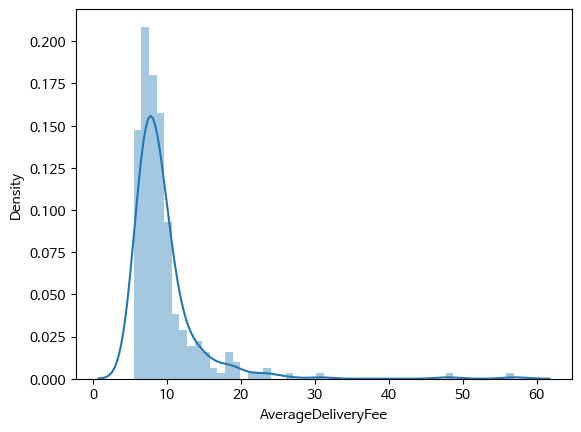

In [ ]:
# Distribution of Average Delivery Fee per Customer
import seaborn as sns

sns.distplot(deli_cost['AverageDeliveryFee']);

```
As with loyal customers, a large portion of orders had an average delivery fee below $10.
```

## 🔉**Process 3**
### **┗ Marketing Strategies Based on RFM Analysis**  

### **Strategies Applicable to All Customer Segments**

---
1. Encourage Coupon Usage
- Across all segments, there were customers who either did not use coupons or only clicked on them without completing the application.

  `Action Plan`   
▶ Add a **coupon reminder pop-up** before final checkout, or simplify the coupon application process by allowing customers to **select and apply coupons directly within the payment screen**.

2. Implement a Loyalty Program  
  `Action Plan`   
▶ Offer **incentives** such as point accumulation, discounts, or exclusive benefits tailored to each customer segment.  
This helps maintain engagement with loyal customers while boosting overall customer retention and satisfaction.

### **Enthusiast**
---
`Action Plan`  
▶ Send **new arrival notifications** based on each customer's transaction cycle.  
Since no transactions were observed between **September and December**, target this period with timely alerts to encourage visits.
  - As this group has the **potential to become loyal customers**, it’s important to re-engage them with strategies that spark interest in purchasing.
  - Combine **new brand or product launch announcements** with limited-time promotions to drive both visits and conversions.


▶  Use **promotional reminders during the second half of the year** to encourage return visits during periods of inactivity.


### **Potential**
---
`Action Plan`   
▶ Display **personalized product recommendations** or **popular items** on the homepage based on past transaction data.
  - These customers may have difficulty finding what they need or deciding what to purchase.   
  By placing relevant or trending products front and center, we can **encourage immediate engagement and increase purchase likelihood**.

▶ Leverage **photo reviews** and **review-based events** to promote purchasing.
  - Host review campaigns where customers are rewarded for sharing product feedback.  
Provide **store credits or discount coupons** as incentives, encouraging **repeat purchases** during their next visit.

### **Lost**

---
`Action Plan`  
▶ Offer **delivery fee discounts** or **surprise promotions** to customers who haven't made a second purchase within a month of their first.
  - Many customers made only one purchase. These time-sensitive promotions can help encourage **revisits and reactivation**.  

▶ Recommend products based on **items frequently purchased by loyal customers**, or suggest **similar items** based on the customer’s past purchases.
  - Since purchasing behavior differs slightly from loyal customers, offering curated recommendations can help spark renewed interest.

▶ A noticeable drop in activity was observed starting in **September**.  
Plan **seasonal promotions** (e.g., **Halloween or fall campaigns**) to re-engage lapsed customers during this low-activity period.
